In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Tensile Strength

In [99]:
df = pd.read_csv("sepSheets/tensileSheet.csv")
df

SaltWater  Modulus(GPa)  MaximumForce(KN)  TensileStrain  \
0          0         7.205              3.02           1.60   
1          0         6.975              2.93           1.64   
2          0         6.842              2.96           1.73   
3          0         7.026              2.92           1.63   
4          0         6.906              3.02           1.72   
5          1        10.223              2.72           1.57   
6          1        10.059              2.81           1.60   
7          1         9.564              2.76           1.67   
8          1        10.182              2.80           1.59   
9          1        10.011              2.83           1.66   

   TensileStrength(MPa)  
0                 79.80  
1                 77.49  
2                 78.40  
3                 77.29  
4                 79.83  
5                113.98  
6                117.91  
7                115.53  
8                117.32  
9                118.37

In [100]:
df.describe()

SaltWater  Modulus(GPa)  MaximumForce(KN)  TensileStrain  \
count  10.000000     10.000000         10.000000      10.000000   
mean    0.500000      8.499300          2.877000       1.641000   
std     0.527046      1.602383          0.107191       0.054252   
min     0.000000      6.842000          2.720000       1.570000   
25%     0.000000      6.987750          2.802500       1.600000   
50%     0.500000      8.384500          2.875000       1.635000   
75%     1.000000     10.047000          2.952500       1.667500   
max     1.000000     10.223000          3.020000       1.730000   

       TensileStrength(MPa)  
count             10.000000  
mean              97.592000  
std               20.112785  
min               77.290000  
25%               78.750000  
50%               96.905000  
75%              116.872500  
max              118.370000

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SaltWater             10 non-null     int64  
 1   Modulus(GPa)          10 non-null     float64
 2   MaximumForce(KN)      10 non-null     float64
 3   TensileStrain         10 non-null     float64
 4   TensileStrength(MPa)  10 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 528.0 bytes


In [102]:
df.columns

Index(['SaltWater', 'Modulus(GPa)', 'MaximumForce(KN)', 'TensileStrain',
       'TensileStrength(MPa)'],
      dtype='object')

In [103]:
px.box(df)

Text(0.5, 1.0, '\nRaw Data Correlation Matrix\n')

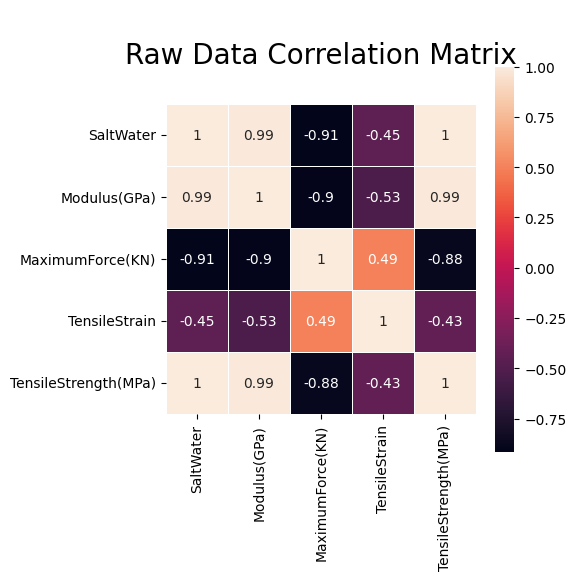

In [104]:
plt.figure(figsize=(df.corr().shape))
sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(df.corr(), linewidths=.5, square = True, annot=True)
plt.title("\nRaw Data Correlation Matrix\n", size = 20)

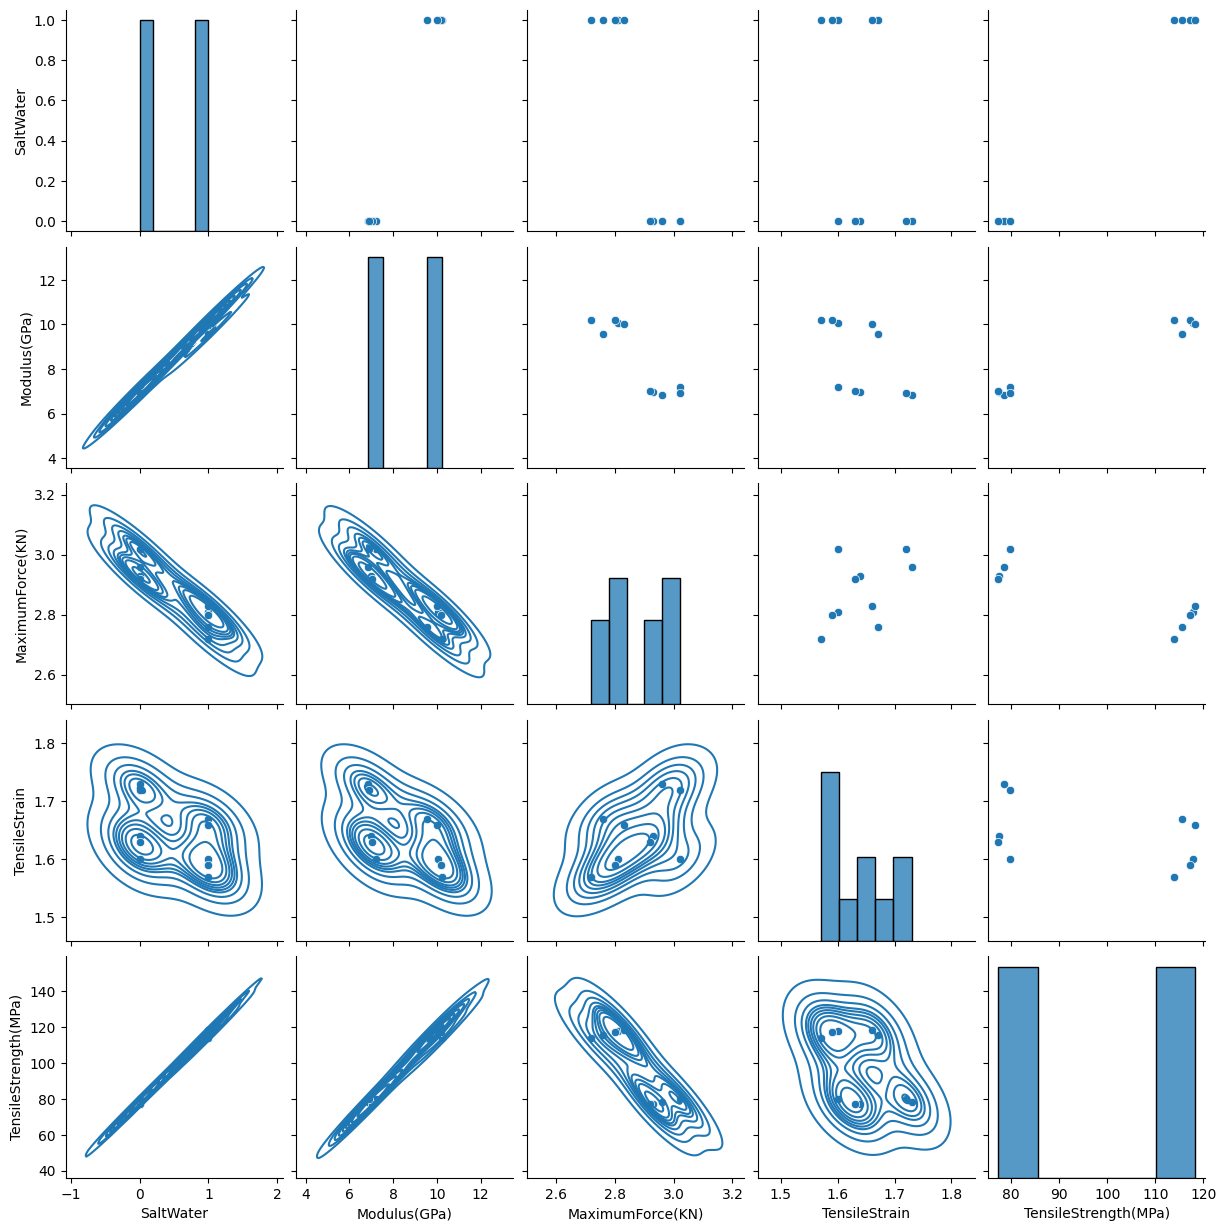

In [105]:
pairGrid = sns.pairplot(data = df)
pairGrid.map_lower(sns.kdeplot)

In [106]:
fig = px.scatter_3d(df, x='Modulus(GPa)', y='MaximumForce(KN)', z='TensileStrain', color='TensileStrength(MPa)')
fig.show()

In [107]:
fig = px.scatter_3d(df, x='Modulus(GPa)', y='MaximumForce(KN)', z='TensileStrain', color='SaltWater')
fig.show()

In [108]:
fig = px.scatter_3d(df, x='TensileStrength(MPa)', y='MaximumForce(KN)', z='TensileStrain', color='SaltWater')
fig.show()

In [109]:
dataStuff = df[['SaltWater', 'Modulus(GPa)', 'MaximumForce(KN)', 'TensileStrain']]
targetStuff = df['TensileStrength(MPa)']

In [110]:
xTrain, xTest, yTrain, yTest = train_test_split(dataStuff, targetStuff, test_size=0.2, random_state=42)

# LinearReg Model - Tensile Strength

In [111]:
modelLR = LinearRegression()
modelLR.fit(xTrain, yTrain)

LinearRegression()

In [112]:
yPred = modelLR.predict(xTest)
yPred

array([117.09589893,  77.13385474])

In [113]:
rmseLR = np.sqrt(mean_squared_error(yTest, yPred))
maeLR = mean_absolute_error(yTest, yPred)
mseLR = mean_squared_error(yTest, yPred)
rsLR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLR)
print('Mean Absolute Error:', maeLR)
print('Mean Squared Error:', mseLR)
print('R-squared:', rsLR)

Root Mean Square Error:  0.297540527545323
Mean Absolute Error: 0.29012316087933954
Mean Squared Error: 0.08853036553194911
R-squared: 0.9997767807544808


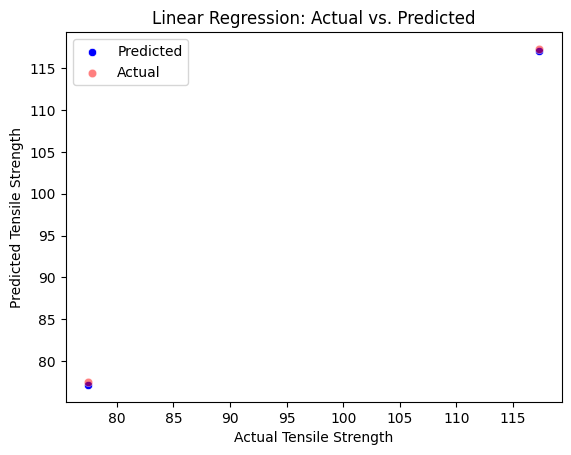

In [114]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RidgeReg Model - Tensile Strength

In [115]:
modelRR = Ridge(alpha=1.0)
modelRR.fit(xTrain, yTrain)

Ridge()

In [116]:
yPred = modelRR.predict(xTest)
yPred

array([117.53735109,  79.76612558])

In [117]:
rmseRR = np.sqrt(mean_squared_error(yTest, yPred))
maeRR = mean_absolute_error(yTest, yPred)
mseRR = mean_squared_error(yTest, yPred)
rsRR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRR)
print("Mean Absolute Error: ", maeRR)
print('Mean Squared Error:', mseRR)
print('R-squared:', rsRR)

Root Mean Square Error:  1.6167852605954034
Mean Absolute Error:  1.2467383343927736
Mean Squared Error: 2.613994578878547
R-squared: 0.9934091100360601


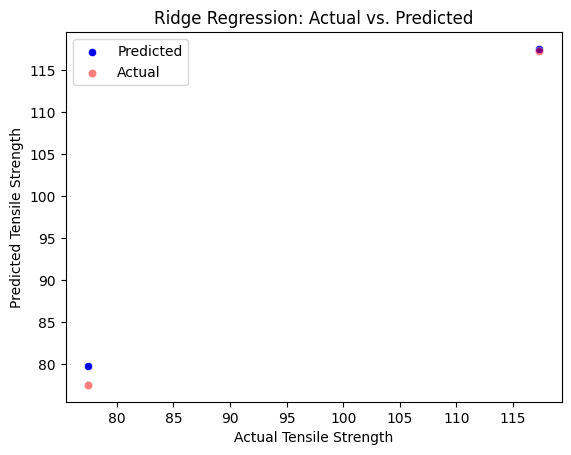

In [118]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Ridge Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# LassoReg Model - Tensile Strength

In [119]:
modelLSR = Lasso(alpha=1.0)
modelLSR.fit(xTrain, yTrain)

Lasso()

In [120]:
yPred = modelLSR.predict(xTest)
yPred

array([118.07761818,  79.57691319])

In [121]:
rmseLSR = np.sqrt(mean_squared_error(yTest, yPred))
maeLSR = mean_absolute_error(yTest, yPred)
mseLSR = mean_squared_error(yTest, yPred)
rsLSR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLSR)
print("Mean Absolute Error: ", maeLSR)
print('Mean Squared Error:', mseLSR)
print('R-squared:', rsLSR)

Root Mean Square Error:  1.5699031736569236
Mean Absolute Error:  1.4222656827367004
Mean Squared Error: 2.4645959746580806
R-squared: 0.9937858016210923


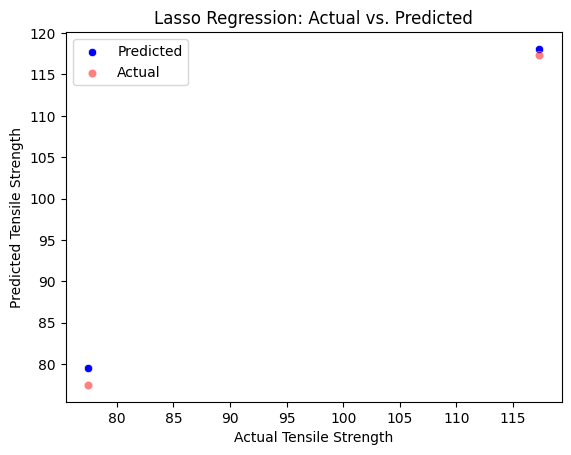

In [122]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Lasso Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# ElasticNetReg Model - Tensile Strength

In [123]:
modelEN = ElasticNet(alpha=1.0, l1_ratio=0.5)
modelEN.fit(xTrain, yTrain)

ElasticNet()

In [124]:
yPred = modelEN.predict(xTest)
yPred

array([114.76950088,  82.34347789])

In [125]:
rmseEN = np.sqrt(mean_squared_error(yTest, yPred))
maeEN = mean_absolute_error(yTest, yPred)
mseEN = mean_squared_error(yTest, yPred)
rsEN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseEN)
print("Mean Absolute Error: ", maeEN)
print('Mean Squared Error:', mseEN)
print('R-squared:', rsEN)

Root Mean Square Error:  3.876937797654484
Mean Absolute Error:  3.7019885036519753
Mean Squared Error: 15.030646686882003
R-squared: 0.9621019342577988


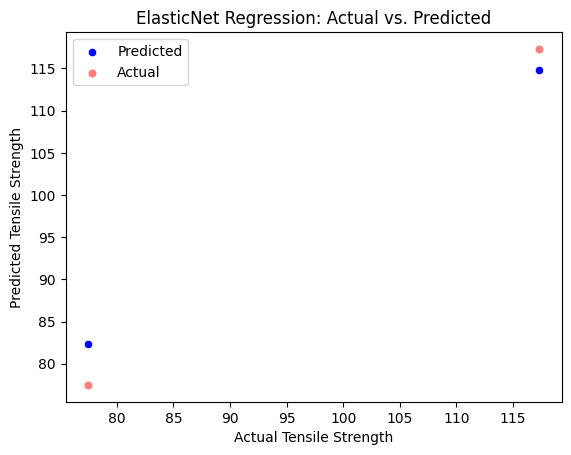

In [126]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('ElasticNet Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# PolyReg Model - Tensile Strength

In [127]:
rsPRlist = []
for i in range(1, 25):
    polyReg = PolynomialFeatures(degree=i)
    linReg = LinearRegression()
    modelPR = Pipeline([('poly', polyReg), ('linear', linReg)])
    modelPR.fit(xTrain, yTrain)
    yPred = modelPR.predict(xTest)
    print("Poly Features Degree: ", i)
    rmsePR = np.sqrt(mean_squared_error(yTest, yPred))
    maePR = mean_absolute_error(yTest, yPred)
    msePR = mean_squared_error(yTest, yPred)
    rsPR = r2_score(yTest, yPred)
    print("Root Mean Square Error: ", rmsePR)
    print("Mean Absolute Error: ", maePR)
    print('Mean Squared Error:', msePR)
    print('R-squared:', rsPR)
    rsPRlist.append(rsPR)
    print("\n")

Poly Features Degree:  1
Root Mean Square Error:  0.29754052754534754
Mean Absolute Error:  0.29012316087936796
Mean Squared Error: 0.08853036553196372
R-squared: 0.9997767807544808


Poly Features Degree:  2
Root Mean Square Error:  0.10184204199183404
Mean Absolute Error:  0.0941875553891407
Mean Squared Error: 0.010371801517066487
R-squared: 0.9999738486823656


Poly Features Degree:  3
Root Mean Square Error:  0.06819719857340913
Mean Absolute Error:  0.060178830396992566
Mean Squared Error: 0.004650857893260995
R-squared: 0.9999882733909013


Poly Features Degree:  4
Root Mean Square Error:  0.02430233379043422
Mean Absolute Error:  0.02420624425175788
Mean Squared Error: 0.0005906034276616809
R-squared: 0.999998510860644


Poly Features Degree:  5
Root Mean Square Error:  0.06481485333923365
Mean Absolute Error:  0.0647681841523351
Mean Squared Error: 0.004200965213386368
R-squared: 0.9999894077441142


Poly Features Degree:  6
Root Mean Square Error:  0.12708365433953342
Mean Ab

In [128]:
prDf = pd.DataFrame({'Index': range(len(rsPRlist)), 'Tensile Strength Values': rsPRlist})
fig = px.line(prDf, x='Index', y='Tensile Strength Values')
fig.show()

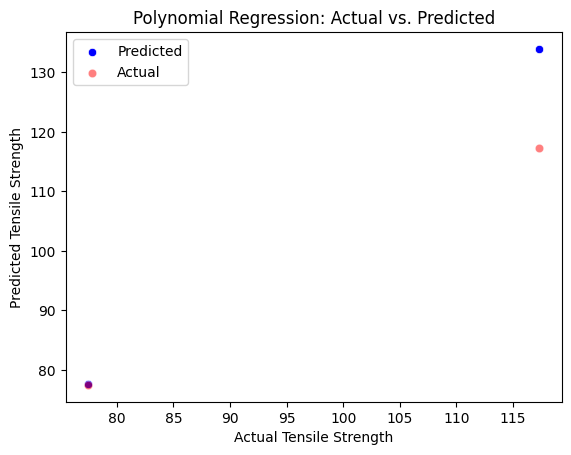

In [129]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# KNeighborsReg Model - Tensile Strength

In [130]:
modelKN = KNeighborsRegressor(n_neighbors=3)
modelKN.fit(xTrain, yTrain)

KNeighborsRegressor(n_neighbors=3)

In [131]:
yPred = modelKN.predict(xTest)
yPred

array([116.75333333,  78.50666667])

In [132]:
rmseKN = np.sqrt(mean_squared_error(yTest, yPred))
maeKN = mean_absolute_error(yTest, yPred)
mseKN = mean_squared_error(yTest, yPred)
rsKN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseKN)
print("Mean Absolute Error: ", maeKN)
print('Mean Squared Error:', mseKN)
print('R-squared:', rsKN)

Root Mean Square Error:  0.8230195083417661
Mean Absolute Error:  0.7916666666666714
Mean Squared Error: 0.6773611111111224
R-squared: 0.998292111014591


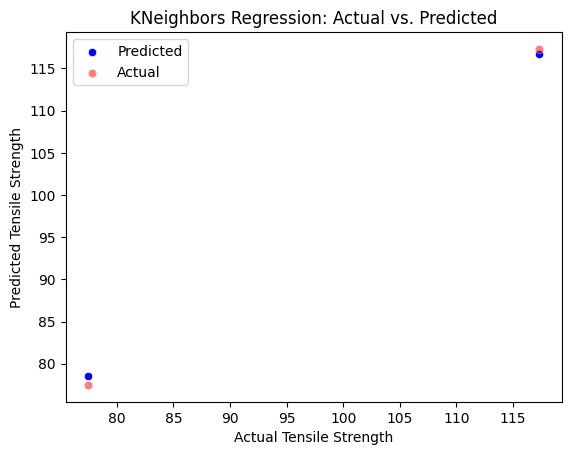

In [133]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('KNeighbors Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# DecisionTreeReg Model - Tensile Strength

In [134]:
modelDT = DecisionTreeRegressor(random_state=42)
modelDT.fit(xTrain, yTrain)

DecisionTreeRegressor(random_state=42)

In [135]:
yPred = modelDT.predict(xTest)
yPred

array([117.91,  77.29])

In [136]:
rmseDT = np.sqrt(mean_squared_error(yTest, yPred))
maeDT = mean_absolute_error(yTest, yPred)
mseDT = mean_squared_error(yTest, yPred)
rsDT = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseDT)
print('Mean Absolute Error:', maeDT)
print('Mean Squared Error:', mseDT)
print('R-squared:', rsDT)

Root Mean Square Error:  0.4405110668303348
Mean Absolute Error: 0.394999999999996
Mean Squared Error: 0.19404999999999972
R-squared: 0.9995107250000299


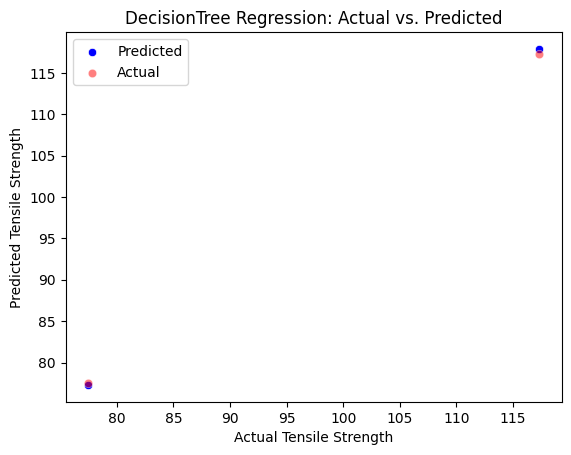

In [137]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('DecisionTree Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RandomForestReg Model - Tensile Strength

In [138]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)
modelRF.fit(xTrain, yTrain)

RandomForestRegressor(random_state=42)

In [139]:
yPred = modelRF.predict(xTest)
yPred

array([117.1747,  79.7337])

In [140]:
rmseRF = np.sqrt(mean_squared_error(yTest, yPred))
maeRF = mean_absolute_error(yTest, yPred)
mseRF = mean_squared_error(yTest, yPred)
rsRF = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRF)
print('Mean Absolute Error:', maeRF)
print('Mean Squared Error:', mseRF)
print('R-squared:', rsRF)

Root Mean Square Error:  1.5898587641674289
Mean Absolute Error: 1.1945000000000192
Mean Squared Error: 2.5276508899999843
R-squared: 0.993626815825153


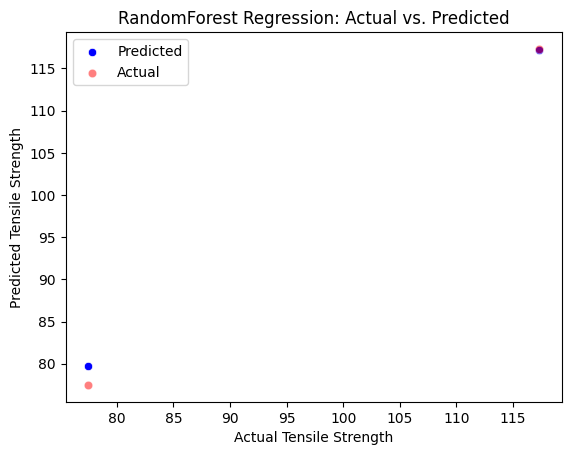

In [141]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('RandomForest Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# SupportVectorReg Model - Tensile Strength

In [142]:
modelSVR = SVR()
modelSVR.fit(xTrain, yTrain)

SVR()

In [143]:
yPred = modelSVR.predict(xTest)
yPred

array([97.83521216, 95.98929408])

In [144]:
rmseSVR = np.sqrt(mean_squared_error(yTest, yPred))
maeSVR = mean_absolute_error(yTest, yPred)
mseSVR = mean_squared_error(yTest, yPred)
rsSVR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseSVR)
print('Mean Absolute Error:', maeSVR)
print('Mean Squared Error:', mseSVR)
print('R-squared:', rsSVR)

Root Mean Square Error:  18.998432020108517
Mean Absolute Error: 18.992040957611266
Mean Squared Error: 360.9404192226846
R-squared: 0.08992979332969875


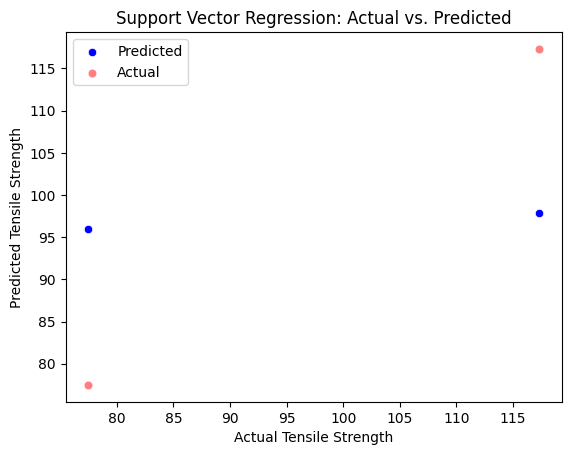

In [145]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Support Vector Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# GradBoostingReg  - Tensile Strength

In [146]:
modelGBR = GradientBoostingRegressor(random_state=42)
modelGBR.fit(xTrain, yTrain)

GradientBoostingRegressor(random_state=42)

In [147]:
yPred = modelGBR.predict(xTest)
yPred

array([117.90946157,  77.29054049])

In [148]:
rmseGBR = np.sqrt(mean_squared_error(yTest, yPred))
maeGBR = mean_absolute_error(yTest, yPred)
mseGBR = mean_squared_error(yTest, yPred)
rsGBR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseGBR)
print('Mean Absolute Error:', maeGBR)
print('Mean Squared Error:', mseGBR)
print('R-squared:', rsGBR)

Root Mean Square Error:  0.44002785984577514
Mean Absolute Error: 0.3944605379885928
Mean Squared Error: 0.19362451744045311
R-squared: 0.9995117978059012


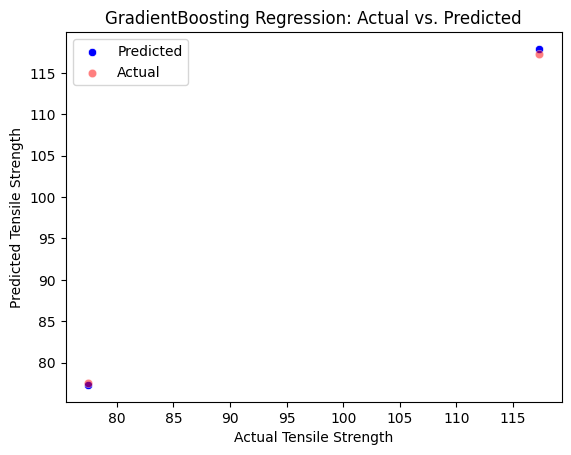

In [149]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('GradientBoosting Regression: Actual vs. Predicted')
plt.legend()
plt.show()

In [150]:
models = ['Linear Reg', 'Ridge Reg', 'Lasso Reg', 'ElasticNet Reg', 'Poly Reg', 'KNeighbors Reg', 'DecisionTree Reg', 'RandomForest Reg', 'SupportVector Reg', 'GradientBoosting Reg']
rsScores = [rsLR, rsRR, rsLSR, rsEN, rsPR, rsKN, rsDT, rsRF, rsSVR, rsGBR]
mseScores = [mseLR, mseRR, mseLSR, mseEN, msePR, mseKN, mseDT, mseRF, mseSVR, mseGBR]
maeScores = [maeLR, maeRR, maeLSR, maeEN, maePR, maeKN, maeDT, maeRF, maeSVR, maeGBR]
rmseScores = [rmseLR, rmseRR, rmseLSR, rmseEN, rmsePR, rmseKN, rmseDT, rmseRF, rmseSVR, rmseGBR]

In [151]:
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg']

In [152]:
rsDf = pd.DataFrame(list(zip(models, rsScores)), columns = ['Model', 'R-squared'])
fig = px.bar(rsDf, x='Model', y='R-squared', title='Model Comparison (R-squared) - Tensile Strength')
fig.show()

In [153]:
mseDf = pd.DataFrame(list(zip(models, mseScores)), columns = ['Model', 'MSE'])
fig = px.bar(mseDf, x='Model', y='MSE', title='Model Comparison (Mean Squared Error) - Tensile Strength')
fig.show()

In [154]:
rmseDf = pd.DataFrame(list(zip(models, rmseScores)), columns = ['Model', 'RMSE'])
fig = px.bar(rmseDf, x='Model', y='RMSE', title='Model Comparison (Root Mean Squared Error) - Tensile Strength')
fig.show()

In [155]:
rsDf = pd.DataFrame(list(zip(models, maeScores)), columns = ['Model', 'MAE'])
fig = px.bar(rsDf, x='Model', y='MAE', title='Model Comparison (Mean Absolute Error) - Tensile Strength')
fig.show()

In [156]:
outLR = modelLR.predict(dataStuff)
outRR = modelRR.predict(dataStuff)
outLSR = modelLSR.predict(dataStuff)
outEN = modelEN.predict(dataStuff)
outPR = modelPR.predict(dataStuff)
outKN = modelKN.predict(dataStuff)
outDT = modelDT.predict(dataStuff)
outRF = modelRF.predict(dataStuff)
outSVR = modelSVR.predict(dataStuff)
outGBR = modelGBR.predict(dataStuff)
outActual = np.array(targetStuff)
outList = [outLR, outRR, outLSR, outEN, outPR, outKN, outDT, outRF, outSVR, outGBR, outActual]
outList

[array([ 80.07189015,  77.13385474,  78.24064406,  76.80110876,
         80.20635704, 114.44814592, 117.41109395, 115.77189358,
        117.09589893, 118.15886654]),
 array([ 82.08311262,  79.76612558,  78.42747804,  80.29289224,
         79.05692628, 117.98672647, 116.26520577, 111.2038836 ,
        117.53735109, 115.79377498]),
 array([ 82.33811124,  79.57691319,  77.9802204 ,  80.18917884,
         78.74855377, 118.56983175, 116.60097748, 110.65839907,
        118.07761818, 116.02472746]),
 array([ 84.47559969,  82.34347789,  81.11055528,  82.81625272,
         81.70384135, 115.14957477, 113.62927922, 109.04058229,
        114.76950088, 113.18431467]),
 array([ 79.8       ,  77.62625603,  78.4       ,  77.29      ,
         79.83      , 113.98      , 117.91      , 115.53      ,
        133.93760452, 118.37      ]),
 array([ 78.97333333,  78.50666667,  78.50666667,  78.97333333,
         78.50666667, 116.75333333, 116.75333333, 117.27      ,
        116.75333333, 116.75333333]),
 arr

In [157]:
models.append("Actual Targets")
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg',
 'Actual Targets']

In [158]:
allDf = []
for i in range(len(models)):
    allDf.append(pd.DataFrame({"Tensile Strength Predicted Values": outList[i], "Models": models[i], "Index": range(len(outList[i]))}))

In [159]:
combinedDf = pd.concat(allDf, ignore_index=True)
combinedDf

Tensile Strength Predicted Values          Models  Index
0                            80.071890      Linear Reg      0
1                            77.133855      Linear Reg      1
2                            78.240644      Linear Reg      2
3                            76.801109      Linear Reg      3
4                            80.206357      Linear Reg      4
..                                 ...             ...    ...
105                         113.980000  Actual Targets      5
106                         117.910000  Actual Targets      6
107                         115.530000  Actual Targets      7
108                         117.320000  Actual Targets      8
109                         118.370000  Actual Targets      9

[110 rows x 3 columns]

In [160]:
fig = px.line(combinedDf, x='Index', y='Tensile Strength Predicted Values', color='Models')
fig.show()

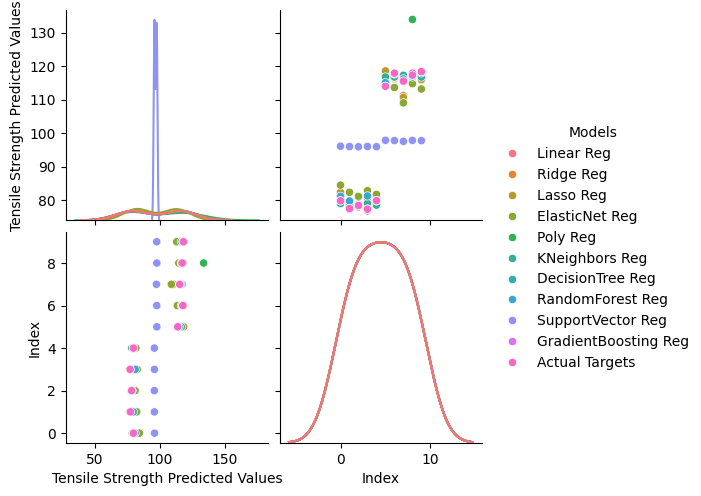

In [161]:
pairGrid = sns.pairplot(data=combinedDf, hue="Models", diag_kind="scatter")
pairGrid.map_diag(sns.kdeplot)
plt.show()

# Young Modulus

In [162]:
dataStuff = df[['SaltWater', 'TensileStrength(MPa)', 'MaximumForce(KN)', 'TensileStrain']]
targetStuff = df['Modulus(GPa)']

In [163]:
xTrain, xTest, yTrain, yTest = train_test_split(dataStuff, targetStuff, test_size=0.2, random_state=42)

# LinearReg Model - Young Modulus

In [164]:
modelLR = LinearRegression()
modelLR.fit(xTrain, yTrain)

LinearRegression()

In [165]:
yPred = modelLR.predict(xTest)
yPred

array([10.11261589,  7.04788001])

In [166]:
rmseLR = np.sqrt(mean_squared_error(yTest, yPred))
maeLR = mean_absolute_error(yTest, yPred)
mseLR = mean_squared_error(yTest, yPred)
rsLR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLR)
print('Mean Absolute Error:', maeLR)
print('Mean Squared Error:', mseLR)
print('R-squared:', rsLR)

Root Mean Square Error:  0.07115353490992928
Mean Absolute Error: 0.07113206167500818
Mean Squared Error: 0.0050628255301785234
R-squared: 0.9980309577592521


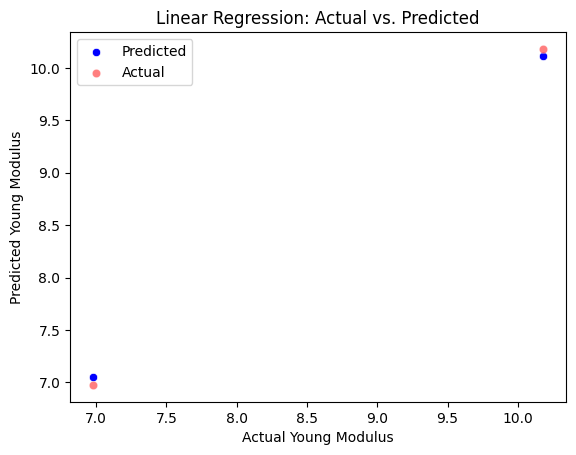

In [167]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RidgeReg Model - Young Modulus

In [168]:
modelRR = Ridge(alpha=1.0)
modelRR.fit(xTrain, yTrain)

Ridge()

In [169]:
yPred = modelRR.predict(xTest)
yPred

array([10.02486386,  6.90398957])

In [170]:
rmseRR = np.sqrt(mean_squared_error(yTest, yPred))
maeRR = mean_absolute_error(yTest, yPred)
mseRR = mean_squared_error(yTest, yPred)
rsRR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRR)
print("Mean Absolute Error: ", maeRR)
print('Mean Squared Error:', mseRR)
print('R-squared:', rsRR)

Root Mean Square Error:  0.12193081663980988
Mean Absolute Error:  0.11407328570998176
Mean Squared Error: 0.01486712404645094
R-squared: 0.9942178542255892


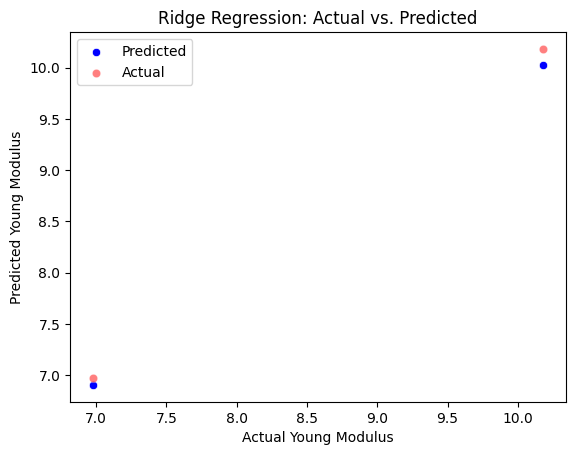

In [171]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('Ridge Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# LassoReg Model - Young Modulus

In [172]:
modelLSR = Lasso(alpha=1.0)
modelLSR.fit(xTrain, yTrain)

Lasso()

In [173]:
yPred = modelLSR.predict(xTest)
yPred

array([9.96903165, 6.95458666])

In [174]:
rmseLSR = np.sqrt(mean_squared_error(yTest, yPred))
maeLSR = mean_absolute_error(yTest, yPred)
mseLSR = mean_squared_error(yTest, yPred)
rsLSR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLSR)
print("Mean Absolute Error: ", maeLSR)
print('Mean Squared Error:', mseLSR)
print('R-squared:', rsLSR)

Root Mean Square Error:  0.15128156578770705
Mean Absolute Error:  0.11669084902275673
Mean Squared Error: 0.022886112147180337
R-squared: 0.9910990964875885


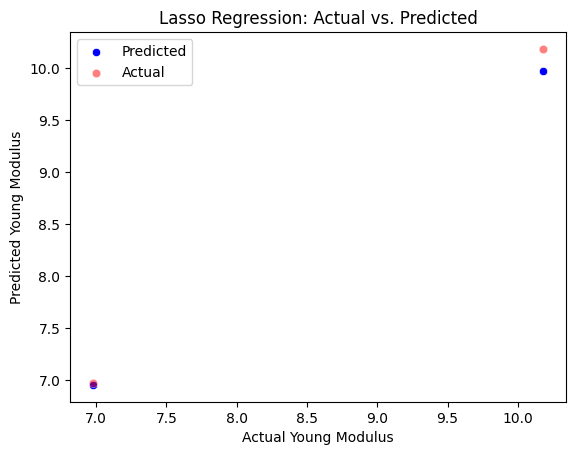

In [175]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('Lasso Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# ElasticNetReg Model - Young Modulus

In [176]:
modelEN = ElasticNet(alpha=1.0, l1_ratio=0.5)
modelEN.fit(xTrain, yTrain)

ElasticNet()

In [177]:
yPred = modelEN.predict(xTest)
yPred

array([9.99455121, 6.92846091])

In [178]:
rmseEN = np.sqrt(mean_squared_error(yTest, yPred))
maeEN = mean_absolute_error(yTest, yPred)
mseEN = mean_squared_error(yTest, yPred)
rsEN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseEN)
print("Mean Absolute Error: ", maeEN)
print('Mean Squared Error:', mseEN)
print('R-squared:', rsEN)

Root Mean Square Error:  0.13657037694845128
Mean Absolute Error:  0.11699393942410863
Mean Squared Error: 0.01865146785984207
R-squared: 0.9927460411485508


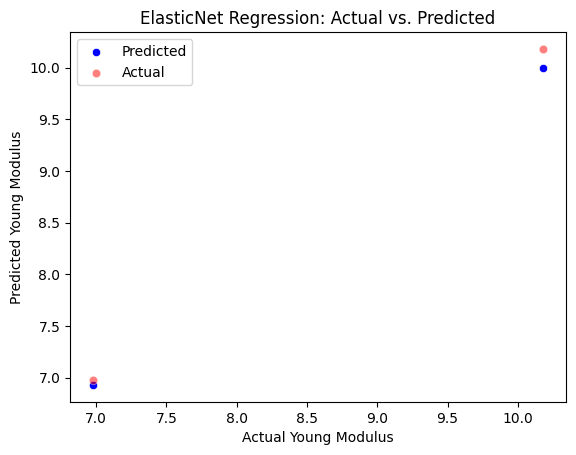

In [179]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('ElasticNet Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# PolyReg Model - Young Modulus

In [180]:
rsPRlist = []
for i in range(1, 25):
    polyReg = PolynomialFeatures(degree=i)
    linReg = LinearRegression()
    modelPR = Pipeline([('poly', polyReg), ('linear', linReg)])
    modelPR.fit(xTrain, yTrain)
    yPred = modelPR.predict(xTest)
    print("Poly Features Degree: ", i)
    rmsePR = np.sqrt(mean_squared_error(yTest, yPred))
    maePR = mean_absolute_error(yTest, yPred)
    msePR = mean_squared_error(yTest, yPred)
    rsPR = r2_score(yTest, yPred)
    print("Root Mean Square Error: ", rmsePR)
    print("Mean Absolute Error: ", maePR)
    print('Mean Squared Error:', msePR)
    print('R-squared:', rsPR)
    rsPRlist.append(rsPR)
    print("\n")

Poly Features Degree:  1
Root Mean Square Error:  0.07115353490992568
Mean Absolute Error:  0.07113206167500463
Mean Squared Error: 0.005062825530178013
R-squared: 0.9980309577592523


Poly Features Degree:  2
Root Mean Square Error:  0.1175786726789726
Mean Absolute Error:  0.10736126222226083
Mean Squared Error: 0.013824744268948978
R-squared: 0.9946232582436751


Poly Features Degree:  3
Root Mean Square Error:  0.12380459176136963
Mean Absolute Error:  0.1088292895783578
Mean Squared Error: 0.015327576941199393
R-squared: 0.9940387741458531


Poly Features Degree:  4
Root Mean Square Error:  0.13125907376290158
Mean Absolute Error:  0.1121938439093988
Mean Squared Error: 0.017228944445094835
R-squared: 0.9932992912408943


Poly Features Degree:  5
Root Mean Square Error:  0.13905768000831095
Mean Absolute Error:  0.11661241876231321
Mean Squared Error: 0.0193370383692938
R-squared: 0.9924794079643585


Poly Features Degree:  6
Root Mean Square Error:  0.14654075422544074
Mean Absol

In [181]:
prDf = pd.DataFrame({'Index': range(len(rsPRlist)), 'Young Modulus Predicted Values': rsPRlist})
fig = px.line(prDf, x='Index', y='Young Modulus Predicted Values')
fig.show()

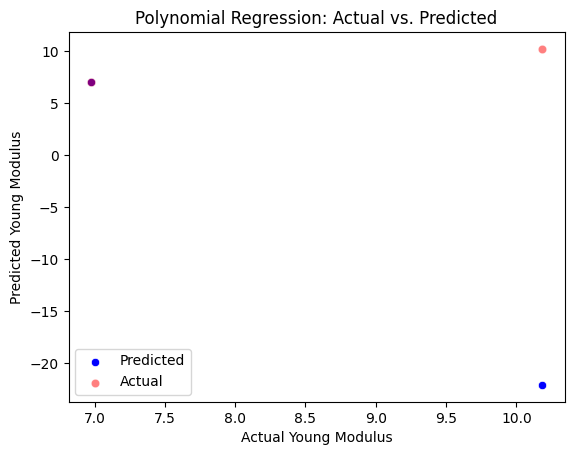

In [182]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# KNeighborsReg Model - Young Modulus

In [183]:
modelKN = KNeighborsRegressor(n_neighbors=3)
modelKN.fit(xTrain, yTrain)

KNeighborsRegressor(n_neighbors=3)

In [184]:
yPred = modelKN.predict(xTest)
yPred

array([9.878     , 7.02433333])

In [185]:
rmseKN = np.sqrt(mean_squared_error(yTest, yPred))
maeKN = mean_absolute_error(yTest, yPred)
mseKN = mean_squared_error(yTest, yPred)
rsKN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseKN)
print("Mean Absolute Error: ", maeKN)
print('Mean Squared Error:', mseKN)
print('R-squared:', rsKN)

Root Mean Square Error:  0.21777256229582506
Mean Absolute Error:  0.1766666666666672
Mean Squared Error: 0.04742488888888901
R-squared: 0.9815554360053749


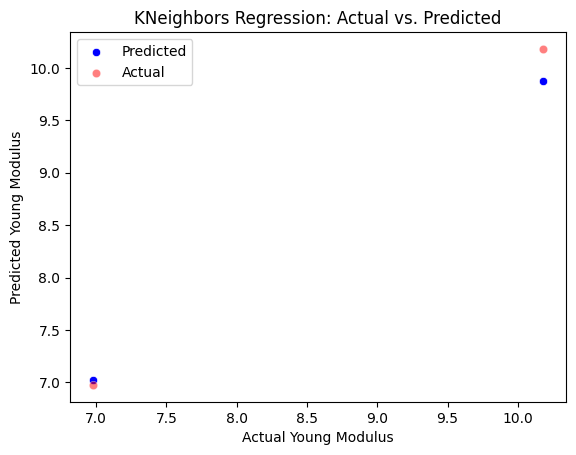

In [186]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('KNeighbors Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# DecisionTreeReg Model - Young Modulus

In [187]:
modelDT = DecisionTreeRegressor(random_state=42)
modelDT.fit(xTrain, yTrain)

DecisionTreeRegressor(random_state=42)

In [188]:
yPred = modelDT.predict(xTest)
yPred

array([10.059,  7.026])

In [189]:
rmseDT = np.sqrt(mean_squared_error(yTest, yPred))
maeDT = mean_absolute_error(yTest, yPred)
mseDT = mean_squared_error(yTest, yPred)
rsDT = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseDT)
print('Mean Absolute Error:', maeDT)
print('Mean Squared Error:', mseDT)
print('R-squared:', rsDT)

Root Mean Square Error:  0.09415412895885206
Mean Absolute Error: 0.08700000000000063
Mean Squared Error: 0.008865000000000144
R-squared: 0.9965522099546624


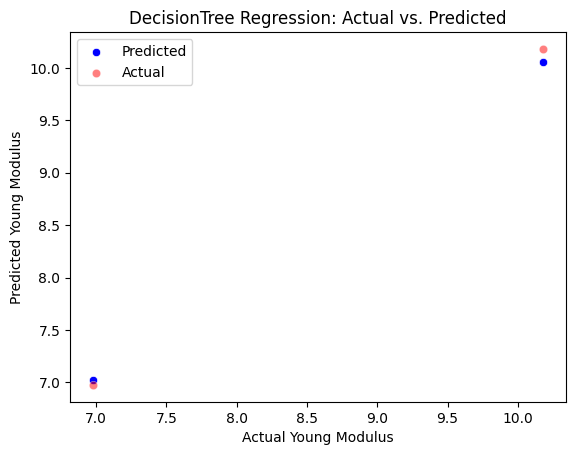

In [190]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('DecisionTree Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RandomForestReg Model - Young Modulus

In [191]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)
modelRF.fit(xTrain, yTrain)

RandomForestRegressor(random_state=42)

In [192]:
yPred = modelRF.predict(xTest)
yPred

array([10.05451,  7.11231])

In [193]:
rmseRF = np.sqrt(mean_squared_error(yTest, yPred))
maeRF = mean_absolute_error(yTest, yPred)
mseRF = mean_squared_error(yTest, yPred)
rsRF = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRF)
print('Mean Absolute Error:', maeRF)
print('Mean Squared Error:', mseRF)
print('R-squared:', rsRF)

Root Mean Square Error:  0.13249101139322958
Mean Absolute Error: 0.13240000000000363
Mean Squared Error: 0.01755386810000089
R-squared: 0.9931729214109022


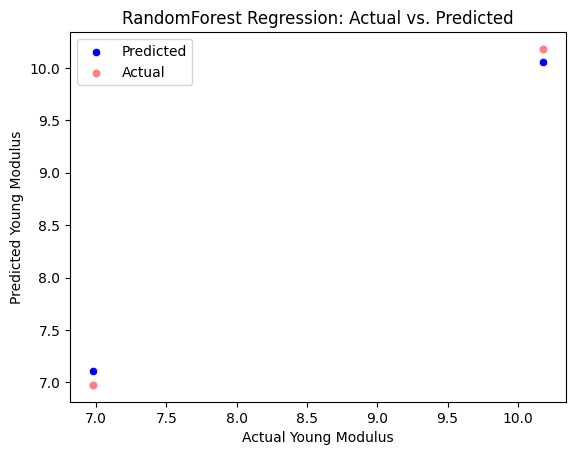

In [194]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('RandomForest Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# SupportVectorReg Model - Young Modulus

In [195]:
modelSVR = SVR()
modelSVR.fit(xTrain, yTrain)

SVR()

In [196]:
yPred = modelSVR.predict(xTest)
yPred

array([9.12087865, 7.63073748])

In [197]:
rmseSVR = np.sqrt(mean_squared_error(yTest, yPred))
maeSVR = mean_absolute_error(yTest, yPred)
mseSVR = mean_squared_error(yTest, yPred)
rsSVR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseSVR)
print('Mean Absolute Error:', maeSVR)
print('Mean Squared Error:', mseSVR)
print('R-squared:', rsSVR)

Root Mean Square Error:  0.8820346246085027
Mean Absolute Error: 0.8584294134098558
Mean Squared Error: 0.7779850790082623
R-squared: 0.6974247929130464


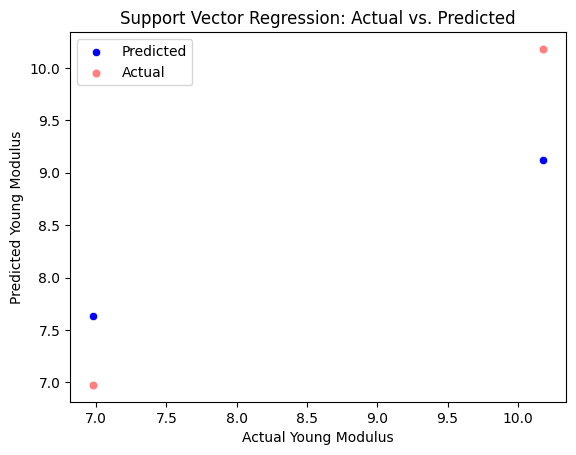

In [198]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('Support Vector Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# GradBoostingReg Model - Young Modulus

In [199]:
modelGBR = GradientBoostingRegressor(random_state=42)
modelGBR.fit(xTrain, yTrain)

GradientBoostingRegressor(random_state=42)

In [200]:
yPred = modelGBR.predict(xTest)
yPred

array([10.05895674,  7.02603846])

In [201]:
rmseGBR = np.sqrt(mean_squared_error(yTest, yPred))
maeGBR = mean_absolute_error(yTest, yPred)
mseGBR = mean_squared_error(yTest, yPred)
rsGBR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseGBR)
print('Mean Absolute Error:', maeGBR)
print('Mean Squared Error:', mseGBR)
print('R-squared:', rsGBR)

Root Mean Square Error:  0.09419280291342727
Mean Absolute Error: 0.08704086080166107
Mean Squared Error: 0.008872284120687753
R-squared: 0.9965493770027396


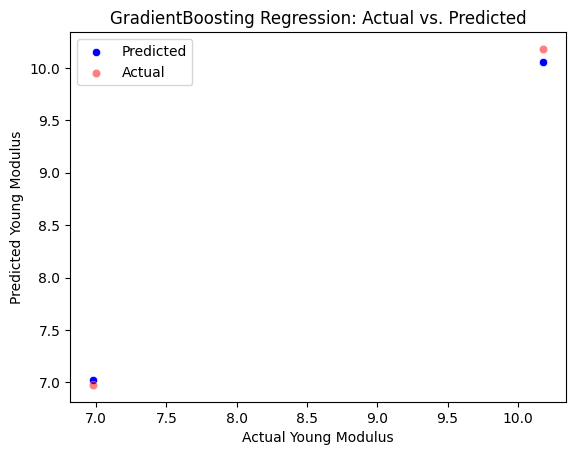

In [202]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('GradientBoosting Regression: Actual vs. Predicted')
plt.legend()
plt.show()

In [203]:
models = ['Linear Reg', 'Ridge Reg', 'Lasso Reg', 'ElasticNet Reg', 'Poly Reg', 'KNeighbors Reg', 'DecisionTree Reg', 'RandomForest Reg', 'SupportVector Reg', 'GradientBoosting Reg']
rsScores = [rsLR, rsRR, rsLSR, rsEN, rsPR, rsKN, rsDT, rsRF, rsSVR, rsGBR]
mseScores = [mseLR, mseRR, mseLSR, mseEN, msePR, mseKN, mseDT, mseRF, mseSVR, mseGBR]
maeScores = [maeLR, maeRR, maeLSR, maeEN, maePR, maeKN, maeDT, maeRF, maeSVR, maeGBR]
rmseScores = [rmseLR, rmseRR, rmseLSR, rmseEN, rmsePR, rmseKN, rmseDT, rmseRF, rmseSVR, rmseGBR]

In [204]:
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg']

In [205]:
rsDf = pd.DataFrame(list(zip(models, rsScores)), columns = ['Model', 'R-squared'])
fig = px.bar(rsDf, x='Model', y='R-squared', title='Model Comparison (R-squared) - Young Modulus')
fig.show()

In [206]:
mseDf = pd.DataFrame(list(zip(models, mseScores)), columns = ['Model', 'MSE'])
fig = px.bar(mseDf, x='Model', y='MSE', title='Model Comparison (Mean Squared Error) - Young Modulus')
fig.show()

In [207]:
rmseDf = pd.DataFrame(list(zip(models, rmseScores)), columns = ['Model', 'RMSE'])
fig = px.bar(rmseDf, x='Model', y='RMSE', title='Model Comparison (Root Mean Squared Error) - Young Modulus')
fig.show()

In [208]:
rsDf = pd.DataFrame(list(zip(models, maeScores)), columns = ['Model', 'MAE'])
fig = px.bar(rsDf, x='Model', y='MAE', title='Model Comparison (Mean Absolute Error) - Young Modulus')
fig.show()

In [209]:
outLR = modelLR.predict(dataStuff)
outRR = modelRR.predict(dataStuff)
outLSR = modelLSR.predict(dataStuff)
outEN = modelEN.predict(dataStuff)
outPR = modelPR.predict(dataStuff)
outKN = modelKN.predict(dataStuff)
outDT = modelDT.predict(dataStuff)
outRF = modelRF.predict(dataStuff)
outSVR = modelSVR.predict(dataStuff)
outGBR = modelGBR.predict(dataStuff)
outActual = np.array(targetStuff)
outList = [outLR, outRR, outLSR, outEN, outPR, outKN, outDT, outRF, outSVR, outGBR, outActual]
outList

[array([ 7.27434209,  7.04788001,  6.76990652,  7.07381209,  6.8609393 ,
        10.07455804, 10.09530894,  9.78038338, 10.11261589,  9.90674964]),
 array([ 7.08183829,  6.90398957,  6.96648942,  6.88966976,  7.07532952,
         9.77144119, 10.06931918,  9.88225989, 10.02486386, 10.09965274]),
 array([ 7.12941387,  6.95458666,  7.02345798,  6.9394501 ,  7.13168435,
         9.71625117, 10.01368448,  9.83355948,  9.96903165, 10.04849856]),
 array([ 7.10628337,  6.92846091,  6.99851218,  6.91306503,  7.10859275,
         9.73743995, 10.03996907,  9.85675805,  9.99455121, 10.0753796 ]),
 array([  7.205     ,   7.0234372 ,   6.842     ,   7.026     ,
          6.906     ,  10.223     ,  10.059     ,   9.564     ,
        -22.06518418,  10.011     ]),
 array([6.98433333, 7.02433333, 7.02433333, 7.02433333, 6.98433333,
        9.94866667, 9.878     , 9.94866667, 9.878     , 9.878     ]),
 array([ 7.205,  7.026,  6.842,  7.026,  6.906, 10.223, 10.059,  9.564,
        10.059, 10.011]),
 array

In [210]:
models.append("Actual Targets")
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg',
 'Actual Targets']

In [211]:
allDf = []
for i in range(len(models)):
    allDf.append(pd.DataFrame({"Young Modulus Predicted Values": outList[i], "Models": models[i], "Index": range(len(outList[i]))}))

In [212]:
combinedDf = pd.concat(allDf, ignore_index=True)
combinedDf

Young Modulus Predicted Values          Models  Index
0                          7.274342      Linear Reg      0
1                          7.047880      Linear Reg      1
2                          6.769907      Linear Reg      2
3                          7.073812      Linear Reg      3
4                          6.860939      Linear Reg      4
..                              ...             ...    ...
105                       10.223000  Actual Targets      5
106                       10.059000  Actual Targets      6
107                        9.564000  Actual Targets      7
108                       10.182000  Actual Targets      8
109                       10.011000  Actual Targets      9

[110 rows x 3 columns]

In [213]:
fig = px.line(combinedDf, x='Index', y='Young Modulus Predicted Values', color='Models')
fig.show()

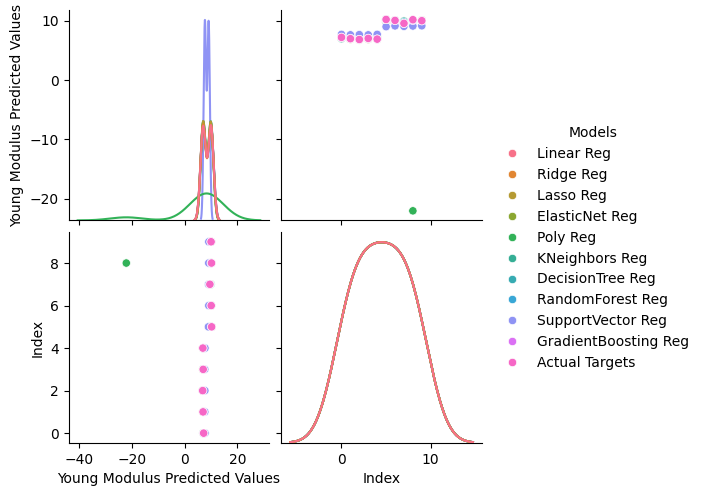

In [214]:
pairGrid = sns.pairplot(data=combinedDf, hue="Models", diag_kind="scatter")
pairGrid.map_diag(sns.kdeplot)
plt.show()

In [215]:
models.remove('Poly Reg')
rsScores.remove(rsPR)
rmseScores.remove(rmsePR)
mseScores.remove(msePR)
maeScores.remove(maePR)

In [216]:
rsDf = pd.DataFrame(list(zip(models, rsScores)), columns = ['Model', 'R-squared'])
fig = px.bar(rsDf, x='Model', y='R-squared', title='Model Comparison (R-squared) w/o PolyReg - Young Modulus')
fig.show()

In [217]:
mseDf = pd.DataFrame(list(zip(models, mseScores)), columns = ['Model', 'MSE'])
fig = px.bar(mseDf, x='Model', y='MSE', title='Model Comparison (Mean Squared Error) w/o PolyReg - Young Modulus')
fig.show()

In [218]:
rmseDf = pd.DataFrame(list(zip(models, rmseScores)), columns = ['Model', 'RMSE'])
fig = px.bar(rmseDf, x='Model', y='RMSE', title='Model Comparison (Root Mean Squared Error) w/o PolyReg - Young Modulus')
fig.show()

In [219]:
rsDf = pd.DataFrame(list(zip(models, maeScores)), columns = ['Model', 'MAE'])
fig = px.bar(rsDf, x='Model', y='MAE', title='Model Comparison (Mean Absolute Error) w/o PolyReg - Young Modulus')
fig.show()

# Tensile Strain

In [220]:
dataStuff = df[['SaltWater', 'TensileStrength(MPa)', 'MaximumForce(KN)', 'Modulus(GPa)']]
targetStuff = df['TensileStrain']

In [221]:
xTrain, xTest, yTrain, yTest = train_test_split(dataStuff, targetStuff, test_size=0.2, random_state=42)

# LinearReg Model - Tensile Strain

In [222]:
modelLR = LinearRegression()
modelLR.fit(xTrain, yTrain)

LinearRegression()

In [223]:
yPred = modelLR.predict(xTest)
yPred

array([1.58925366, 1.66138716])

In [224]:
rmseLR = np.sqrt(mean_squared_error(yTest, yPred))
maeLR = mean_absolute_error(yTest, yPred)
mseLR = mean_squared_error(yTest, yPred)
rsLR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLR)
print('Mean Absolute Error:', maeLR)
print('Mean Squared Error:', mseLR)
print('R-squared:', rsLR)

Root Mean Square Error:  0.01513221428909321
Mean Absolute Error: 0.011066752747040276
Mean Squared Error: 0.0002289839092910367
R-squared: 0.6336257451343387


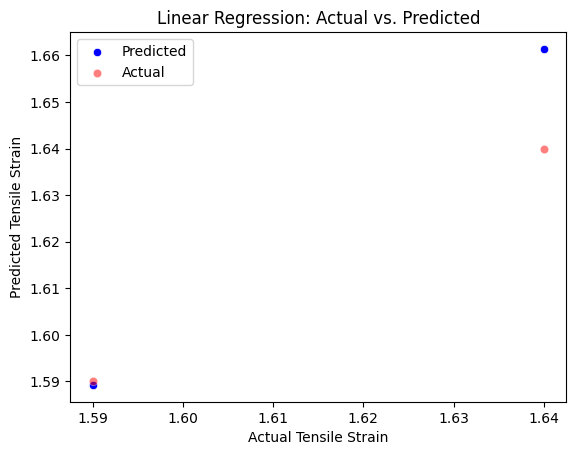

In [225]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strain')
plt.ylabel('Predicted Tensile Strain')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RidgeReg Model - Tensile Strain

In [226]:
modelRR = Ridge(alpha=1.0)
modelRR.fit(xTrain, yTrain)

Ridge()

In [227]:
yPred = modelRR.predict(xTest)
yPred

array([1.61679014, 1.66613923])

In [228]:
rmseRR = np.sqrt(mean_squared_error(yTest, yPred))
maeRR = mean_absolute_error(yTest, yPred)
mseRR = mean_squared_error(yTest, yPred)
rsRR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRR)
print("Mean Absolute Error: ", maeRR)
print('Mean Squared Error:', mseRR)
print('R-squared:', rsRR)

Root Mean Square Error:  0.026466685785813942
Mean Absolute Error:  0.02646468463789986
Mean Squared Error: 0.0007004854564850058
R-squared: -0.12077673037601722


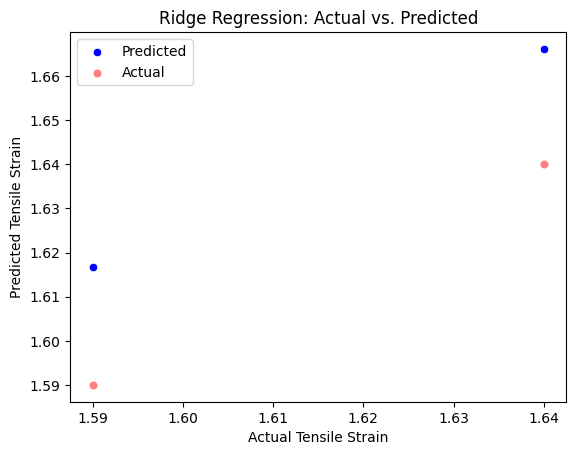

In [229]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strain')
plt.ylabel('Predicted Tensile Strain')
plt.title('Ridge Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# LassoReg Model - Tensile Strain

In [230]:
modelLSR = Lasso(alpha=1.0)
modelLSR.fit(xTrain, yTrain)

Lasso()

In [231]:
yPred = modelLSR.predict(xTest)
yPred

array([1.6475, 1.6475])

In [232]:
rmseLSR = np.sqrt(mean_squared_error(yTest, yPred))
maeLSR = mean_absolute_error(yTest, yPred)
mseLSR = mean_squared_error(yTest, yPred)
rsLSR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLSR)
print("Mean Absolute Error: ", maeLSR)
print('Mean Squared Error:', mseLSR)
print('R-squared:', rsLSR)

Root Mean Square Error:  0.04100304866714174
Mean Absolute Error:  0.03249999999999997
Mean Squared Error: 0.0016812499999999937
R-squared: -1.6900000000000088


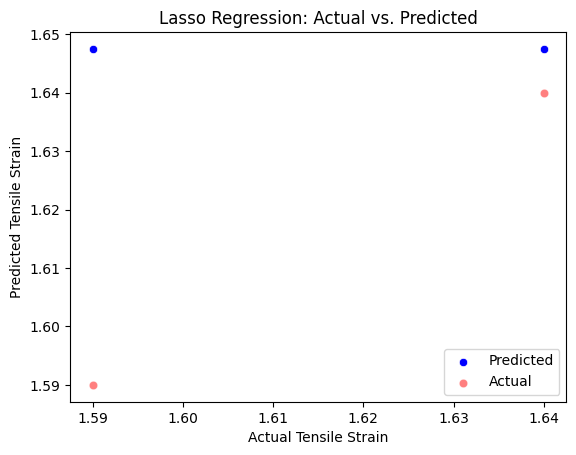

In [233]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strain')
plt.ylabel('Predicted Tensile Strain')
plt.title('Lasso Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# ElasticNetReg Model - Tensile Strain

In [234]:
modelEN = ElasticNet(alpha=1.0, l1_ratio=0.5)
modelEN.fit(xTrain, yTrain)

ElasticNet()

In [235]:
yPred = modelEN.predict(xTest)
yPred

array([1.6475, 1.6475])

In [236]:
rmseEN = np.sqrt(mean_squared_error(yTest, yPred))
maeEN = mean_absolute_error(yTest, yPred)
mseEN = mean_squared_error(yTest, yPred)
rsEN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseEN)
print("Mean Absolute Error: ", maeEN)
print('Mean Squared Error:', mseEN)
print('R-squared:', rsEN)

Root Mean Square Error:  0.04100304866714174
Mean Absolute Error:  0.03249999999999997
Mean Squared Error: 0.0016812499999999937
R-squared: -1.6900000000000088


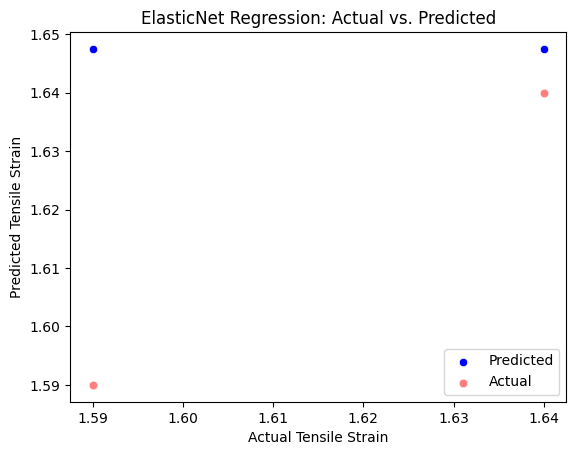

In [237]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strain')
plt.ylabel('Predicted Tensile Strain')
plt.title('ElasticNet Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# PolyReg Model - Tensile Strain

In [238]:
rsPRlist = []
for i in range(1, 25):
    polyReg = PolynomialFeatures(degree=i)
    linReg = LinearRegression()
    modelPR = Pipeline([('poly', polyReg), ('linear', linReg)])
    modelPR.fit(xTrain, yTrain)
    yPred = modelPR.predict(xTest)
    print("Poly Features Degree: ", i)
    rmsePR = np.sqrt(mean_squared_error(yTest, yPred))
    maePR = mean_absolute_error(yTest, yPred)
    msePR = mean_squared_error(yTest, yPred)
    rsPR = r2_score(yTest, yPred)
    print("Root Mean Square Error: ", rmsePR)
    print("Mean Absolute Error: ", maePR)
    print('Mean Squared Error:', msePR)
    print('R-squared:', rsPR)
    rsPRlist.append(rsPR)
    print("\n")

Poly Features Degree:  1
Root Mean Square Error:  0.015132214289097399
Mean Absolute Error:  0.011066752747045383
Mean Squared Error: 0.00022898390929116348
R-squared: 0.6336257451341358


Poly Features Degree:  2
Root Mean Square Error:  0.05492283785754918
Mean Absolute Error:  0.05471771444705653
Mean Squared Error: 0.0030165181183266377
R-squared: -3.826428989322655


Poly Features Degree:  3
Root Mean Square Error:  0.06226930957800015
Mean Absolute Error:  0.06008808308966307
Mean Squared Error: 0.0038774669153208213
R-squared: -5.203947064513358


Poly Features Degree:  4
Root Mean Square Error:  0.07773512126625856
Mean Absolute Error:  0.07099129464207865
Mean Squared Error: 0.006042749078279924
R-squared: -8.668398525247948


Poly Features Degree:  5
Root Mean Square Error:  0.1058156588092863
Mean Absolute Error:  0.09084654672972037
Mean Squared Error: 0.01119695364924329
R-squared: -16.91512583878939


Poly Features Degree:  6
Root Mean Square Error:  0.15287522473739784
M

Poly Features Degree:  14
Root Mean Square Error:  4.723600144929972
Mean Absolute Error:  3.3558631326647683
Mean Squared Error: 22.312398329182454
R-squared: -35698.83732669218


Poly Features Degree:  15
Root Mean Square Error:  7.20454724465036
Mean Absolute Error:  5.109897854043224
Mean Squared Error: 51.90550100039909
R-squared: -83047.80160063914


Poly Features Degree:  16
Root Mean Square Error:  10.93758647745825
Mean Absolute Error:  7.7492381136378405
Mean Squared Error: 119.63079795187758
R-squared: -191408.2767230055


Poly Features Degree:  17
Root Mean Square Error:  16.528297356712258
Mean Absolute Error:  11.702096164628767
Mean Squared Error: 273.18461351190143
R-squared: -437094.3816190454


Poly Features Degree:  18
Root Mean Square Error:  24.86337447980881
Mean Absolute Error:  17.595463506911624
Mean Squared Error: 618.1873905232081
R-squared: -989098.82483714


Poly Features Degree:  19
Root Mean Square Error:  37.23584551770643
Mean Absolute Error:  26.343653

In [239]:
prDf = pd.DataFrame({'Index': range(len(rsPRlist)), 'Tensile Strain Predicted Values': rsPRlist})
fig = px.line(prDf, x='Index', y='Tensile Strain Predicted Values')
fig.show()

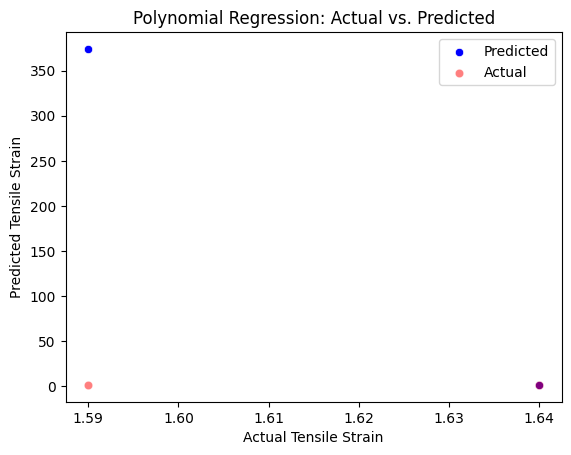

In [240]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strain')
plt.ylabel('Predicted Tensile Strain')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# KNeighborsReg Model - Tensile Strain

In [241]:
modelKN = KNeighborsRegressor(n_neighbors=3)
modelKN.fit(xTrain, yTrain)

KNeighborsRegressor(n_neighbors=3)

In [242]:
yPred = modelKN.predict(xTest)
yPred

array([1.64333333, 1.65333333])

In [243]:
rmseKN = np.sqrt(mean_squared_error(yTest, yPred))
maeKN = mean_absolute_error(yTest, yPred)
mseKN = mean_squared_error(yTest, yPred)
rsKN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseKN)
print("Mean Absolute Error: ", maeKN)
print('Mean Squared Error:', mseKN)
print('R-squared:', rsKN)

Root Mean Square Error:  0.03887301263230195
Mean Absolute Error:  0.033333333333333326
Mean Squared Error: 0.001511111111111107
R-squared: -1.4177777777777885


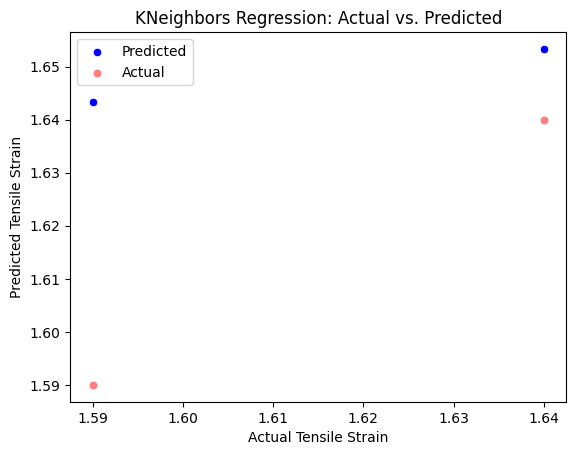

In [244]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strain')
plt.ylabel('Predicted Tensile Strain')
plt.title('KNeighbors Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# DecisionTreeReg Model - Tensile Strain

In [245]:
modelDT = DecisionTreeRegressor(random_state=42)
modelDT.fit(xTrain, yTrain)

DecisionTreeRegressor(random_state=42)

In [246]:
yPred = modelDT.predict(xTest)
yPred

array([1.57, 1.63])

In [247]:
rmseDT = np.sqrt(mean_squared_error(yTest, yPred))
maeDT = mean_absolute_error(yTest, yPred)
mseDT = mean_squared_error(yTest, yPred)
rsDT = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseDT)
print('Mean Absolute Error:', maeDT)
print('Mean Squared Error:', mseDT)
print('R-squared:', rsDT)

Root Mean Square Error:  0.01581138830084191
Mean Absolute Error: 0.015000000000000013
Mean Squared Error: 0.00025000000000000044
R-squared: 0.5999999999999965


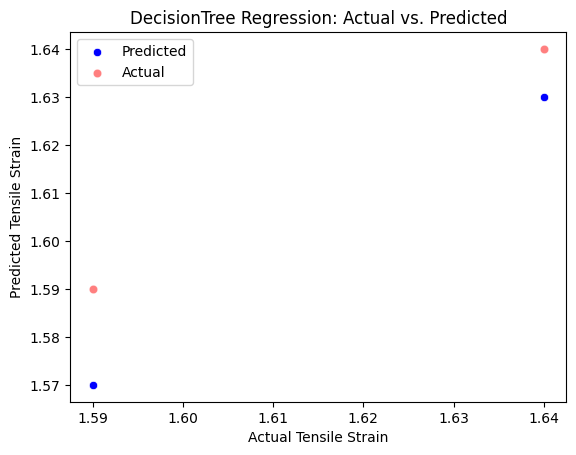

In [248]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strain')
plt.ylabel('Predicted Tensile Strain')
plt.title('DecisionTree Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RandomForestReg Model - Tensile Strain

In [249]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)
modelRF.fit(xTrain, yTrain)

RandomForestRegressor(random_state=42)

In [250]:
yPred = modelRF.predict(xTest)
yPred

array([1.6052, 1.6668])

In [251]:
rmseRF = np.sqrt(mean_squared_error(yTest, yPred))
maeRF = mean_absolute_error(yTest, yPred)
mseRF = mean_squared_error(yTest, yPred)
rsRF = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRF)
print('Mean Absolute Error:', maeRF)
print('Mean Squared Error:', mseRF)
print('R-squared:', rsRF)

Root Mean Square Error:  0.021786234185831616
Mean Absolute Error: 0.020999999999997354
Mean Squared Error: 0.0004746399999998982
R-squared: 0.24057600000015744


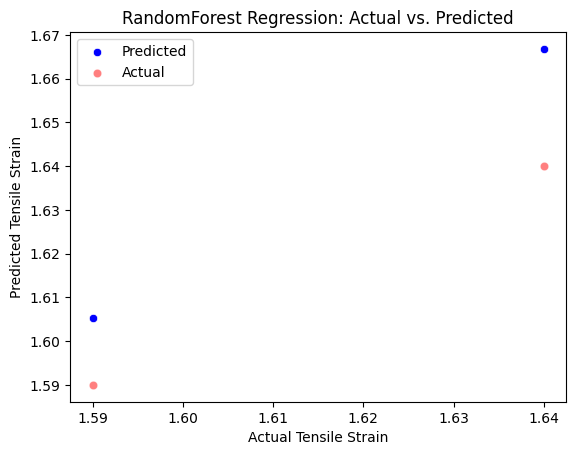

In [252]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strain')
plt.ylabel('Predicted Tensile Strain')
plt.title('RandomForest Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# SupportVectorReg Model - Tensile Strain

In [253]:
modelSVR = SVR()
modelSVR.fit(xTrain, yTrain)

SVR()

In [254]:
yPred = modelSVR.predict(xTest)
yPred

array([1.65, 1.65])

In [255]:
rmseSVR = np.sqrt(mean_squared_error(yTest, yPred))
maeSVR = mean_absolute_error(yTest, yPred)
mseSVR = mean_squared_error(yTest, yPred)
rsSVR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseSVR)
print('Mean Absolute Error:', maeSVR)
print('Mean Squared Error:', mseSVR)
print('R-squared:', rsSVR)

Root Mean Square Error:  0.04301162633521302
Mean Absolute Error: 0.03499999999999992
Mean Squared Error: 0.00184999999999999
R-squared: -1.9600000000000053


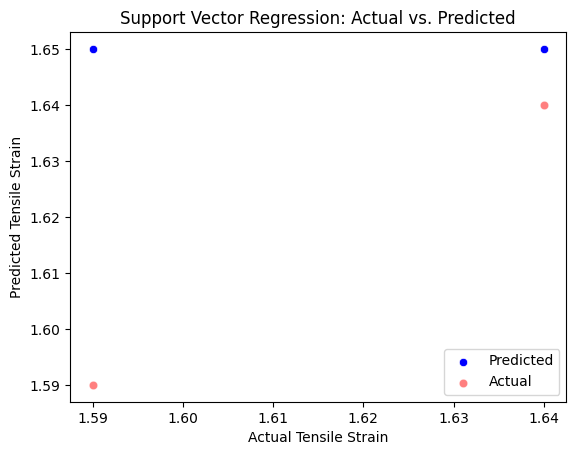

In [256]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strain')
plt.ylabel('Predicted Tensile Strain')
plt.title('Support Vector Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# GradBoostingReg Model - Tensile Strain

In [257]:
modelGBR = GradientBoostingRegressor(random_state=42)
modelGBR.fit(xTrain, yTrain)

GradientBoostingRegressor(random_state=42)

In [258]:
yPred = modelGBR.predict(xTest)
yPred

array([1.59191693, 1.63000173])

In [259]:
rmseGBR = np.sqrt(mean_squared_error(yTest, yPred))
maeGBR = mean_absolute_error(yTest, yPred)
mseGBR = mean_squared_error(yTest, yPred)
rsGBR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseGBR)
print('Mean Absolute Error:', maeGBR)
print('Mean Squared Error:', mseGBR)
print('R-squared:', rsGBR)

Root Mean Square Error:  0.00719860901032504
Mean Absolute Error: 0.005957596545198562
Mean Squared Error: 5.181997168353286e-05
R-squared: 0.9170880453063468


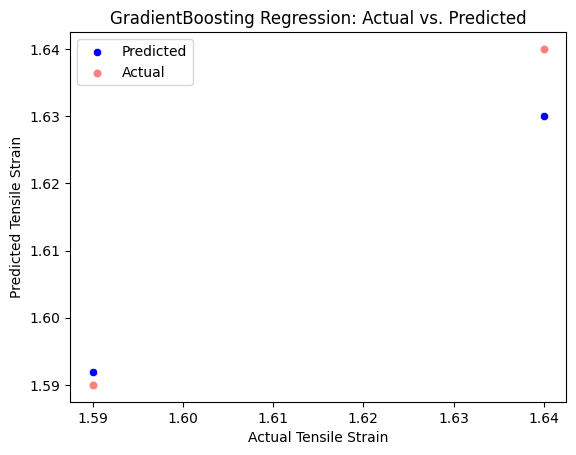

In [260]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strain')
plt.ylabel('Predicted Tensile Strain')
plt.title('GradientBoosting Regression: Actual vs. Predicted')
plt.legend()
plt.show()

In [261]:
models = ['Linear Reg', 'Ridge Reg', 'Lasso Reg', 'ElasticNet Reg', 'Poly Reg', 'KNeighbors Reg', 'DecisionTree Reg', 'RandomForest Reg', 'SupportVector Reg', 'GradientBoosting Reg']
rsScores = [rsLR, rsRR, rsLSR, rsEN, rsPR, rsKN, rsDT, rsRF, rsSVR, rsGBR]
mseScores = [mseLR, mseRR, mseLSR, mseEN, msePR, mseKN, mseDT, mseRF, mseSVR, mseGBR]
maeScores = [maeLR, maeRR, maeLSR, maeEN, maePR, maeKN, maeDT, maeRF, maeSVR, maeGBR]
rmseScores = [rmseLR, rmseRR, rmseLSR, rmseEN, rmsePR, rmseKN, rmseDT, rmseRF, rmseSVR, rmseGBR]

In [262]:
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg']

In [263]:
rsDf = pd.DataFrame(list(zip(models, rsScores)), columns = ['Model', 'R-squared'])
fig = px.bar(rsDf, x='Model', y='R-squared', title='Model Comparison (R-squared) - Tensile Strain')
fig.show()

In [264]:
mseDf = pd.DataFrame(list(zip(models, mseScores)), columns = ['Model', 'MSE'])
fig = px.bar(mseDf, x='Model', y='MSE', title='Model Comparison (Mean Squared Error) - Tensile Strain')
fig.show()

In [265]:
rmseDf = pd.DataFrame(list(zip(models, rmseScores)), columns = ['Model', 'RMSE'])
fig = px.bar(rmseDf, x='Model', y='RMSE', title='Model Comparison (Root Mean Squared Error) - Tensile Strain')
fig.show()

In [266]:
rsDf = pd.DataFrame(list(zip(models, maeScores)), columns = ['Model', 'MAE'])
fig = px.bar(rsDf, x='Model', y='MAE', title='Model Comparison (Mean Absolute Error) - Tensile Strain')
fig.show()

In [267]:
outLR = modelLR.predict(dataStuff)
outRR = modelRR.predict(dataStuff)
outLSR = modelLSR.predict(dataStuff)
outEN = modelEN.predict(dataStuff)
outPR = modelPR.predict(dataStuff)
outKN = modelKN.predict(dataStuff)
outDT = modelDT.predict(dataStuff)
outRF = modelRF.predict(dataStuff)
outSVR = modelSVR.predict(dataStuff)
outGBR = modelGBR.predict(dataStuff)
outActual = np.array(targetStuff)
outList = [outLR, outRR, outLSR, outEN, outPR, outKN, outDT, outRF, outSVR, outGBR, outActual]
outList

[array([1.63678783, 1.66138716, 1.69670275, 1.64921809, 1.69729133,
        1.54990345, 1.61949522, 1.69709632, 1.58925366, 1.63350501]),
 array([1.66135993, 1.66613923, 1.6761305 , 1.66277585, 1.67735219,
        1.6039835 , 1.62519559, 1.64396478, 1.61679014, 1.62923766]),
 array([1.6475, 1.6475, 1.6475, 1.6475, 1.6475, 1.6475, 1.6475, 1.6475,
        1.6475, 1.6475]),
 array([1.6475, 1.6475, 1.6475, 1.6475, 1.6475, 1.6475, 1.6475, 1.6475,
        1.6475, 1.6475]),
 array([  1.6       ,   1.66214265,   1.73      ,   1.63      ,
          1.72      ,   1.57      ,   1.6       ,   1.67      ,
        374.04614031,   1.66      ]),
 array([1.68333333, 1.65333333, 1.69333333, 1.65333333, 1.68333333,
        1.61333333, 1.64333333, 1.61333333, 1.64333333, 1.64333333]),
 array([1.6 , 1.63, 1.73, 1.63, 1.72, 1.57, 1.6 , 1.67, 1.57, 1.66]),
 array([1.6266, 1.6668, 1.7136, 1.6642, 1.7088, 1.5903, 1.6175, 1.6467,
        1.6052, 1.6427]),
 array([1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 

In [268]:
models.append("Actual Targets")
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg',
 'Actual Targets']

In [269]:
allDf = []
for i in range(len(models)):
    allDf.append(pd.DataFrame({"Tensile Strain Predicted Values": outList[i], "Models": models[i], "Index": range(len(outList[i]))}))

In [270]:
combinedDf = pd.concat(allDf, ignore_index=True)
combinedDf

Tensile Strain Predicted Values          Models  Index
0                           1.636788      Linear Reg      0
1                           1.661387      Linear Reg      1
2                           1.696703      Linear Reg      2
3                           1.649218      Linear Reg      3
4                           1.697291      Linear Reg      4
..                               ...             ...    ...
105                         1.570000  Actual Targets      5
106                         1.600000  Actual Targets      6
107                         1.670000  Actual Targets      7
108                         1.590000  Actual Targets      8
109                         1.660000  Actual Targets      9

[110 rows x 3 columns]

In [271]:
fig = px.line(combinedDf, x='Index', y='Tensile Strain Predicted Values', color='Models')
fig.show()

/Users/Sid/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



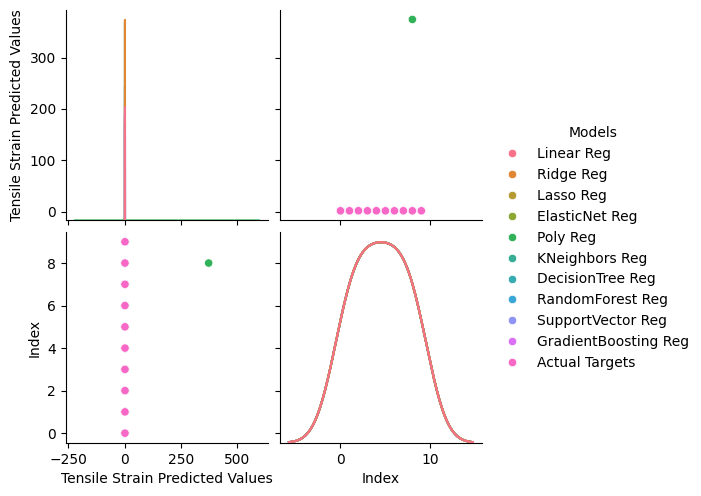

In [272]:
pairGrid = sns.pairplot(data=combinedDf, hue="Models", diag_kind="scatter")
pairGrid.map_diag(sns.kdeplot)
plt.show()

In [273]:
models.remove('Poly Reg')
rsScores.remove(rsPR)
rmseScores.remove(rmsePR)
mseScores.remove(msePR)
maeScores.remove(maePR)

In [274]:
rsDf = pd.DataFrame(list(zip(models, rsScores)), columns = ['Model', 'R-squared'])
fig = px.bar(rsDf, x='Model', y='R-squared', title='Model Comparison (R-squared) w/o PolyReg - Tensile Strain')
fig.show()

In [275]:
mseDf = pd.DataFrame(list(zip(models, mseScores)), columns = ['Model', 'MSE'])
fig = px.bar(mseDf, x='Model', y='MSE', title='Model Comparison (Mean Squared Error) w/o PolyReg - Tensile Strain')
fig.show()

In [276]:
rmseDf = pd.DataFrame(list(zip(models, rmseScores)), columns = ['Model', 'RMSE'])
fig = px.bar(rmseDf, x='Model', y='RMSE', title='Model Comparison (Root Mean Squared Error) w/o PolyReg - Tensile Strain')
fig.show()

In [277]:
rsDf = pd.DataFrame(list(zip(models, maeScores)), columns = ['Model', 'MAE'])
fig = px.bar(rsDf, x='Model', y='MAE', title='Model Comparison (Mean Absolute Error) w/o PolyReg - Tensile Strain')
fig.show()

# Inter Laminar Shear Strength

In [278]:
df = pd.read_csv("sepSheets/ilssSheet.csv")
df

SaltWater  Thickness(mm)  Peak load(KN)      ILSS
0          0           3.16          0.264  5.221500
1          0           3.24          0.387  7.465200
2          0           3.16          0.374  7.397150
3          0           3.16          0.371  7.337800
4          0           3.20          0.405  7.910100
5          1           3.00          0.261  5.437500
6          1           3.01          0.315  6.540698
7          1           2.98          0.293  6.145134
8          1           2.99          0.304  6.354515
9          1           2.99          0.291  6.082776

In [279]:
df.describe()

SaltWater  Thickness(mm)  Peak load(KN)       ILSS
count  10.000000       10.00000      10.000000  10.000000
mean    0.500000        3.08900       0.326500   6.589237
std     0.527046        0.10322       0.052995   0.908811
min     0.000000        2.98000       0.261000   5.221500
25%     0.000000        2.99250       0.291500   6.098365
50%     0.500000        3.08500       0.309500   6.447606
75%     1.000000        3.16000       0.373250   7.382312
max     1.000000        3.24000       0.405000   7.910100

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SaltWater      10 non-null     int64  
 1   Thickness(mm)  10 non-null     float64
 2   Peak load(KN)  10 non-null     float64
 3   ILSS           10 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 448.0 bytes


In [281]:
df.columns

Index(['SaltWater', 'Thickness(mm)', 'Peak load(KN)', 'ILSS'], dtype='object')

In [282]:
px.box(df)

Text(0.5, 1.0, '\nRaw Data Correlation Matrix\n')

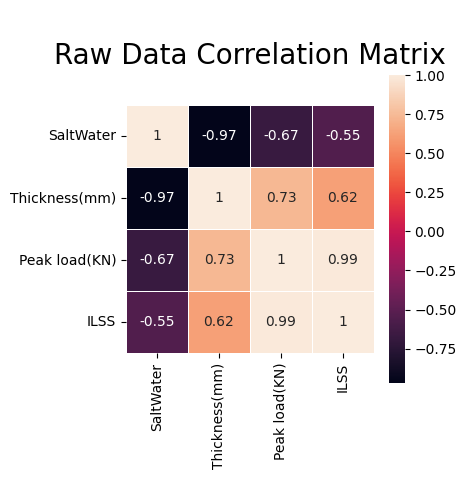

In [283]:
plt.figure(figsize=(df.corr().shape))
sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(df.corr(), linewidths=.5, square = True, annot=True)
plt.title("\nRaw Data Correlation Matrix\n", size = 20)

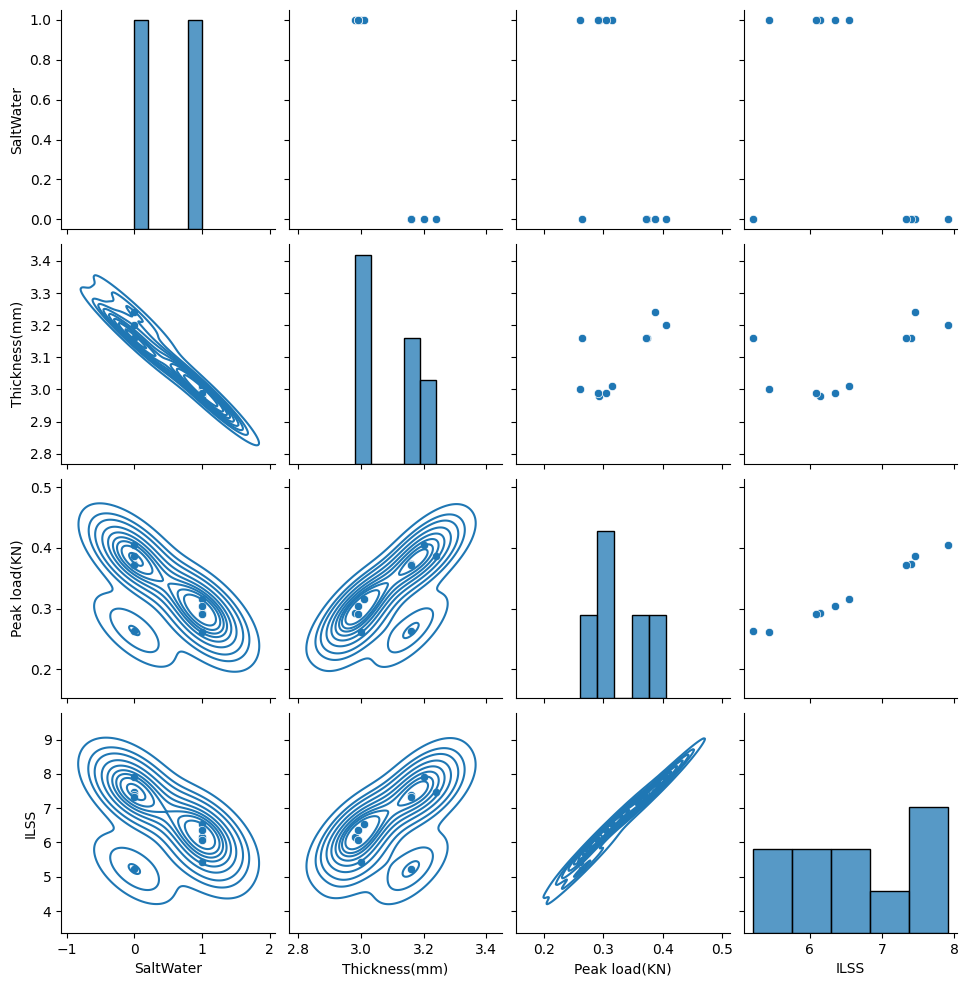

In [284]:
pairGrid = sns.pairplot(data = df)
pairGrid.map_lower(sns.kdeplot)

In [285]:
fig = px.scatter_3d(df, x='Thickness(mm)', y='Peak load(KN)', z='ILSS', color='SaltWater')
fig.show()

In [286]:
fig = px.scatter_3d(df, x='SaltWater', y='Thickness(mm)', z='Peak load(KN)', color='ILSS')
fig.show()

In [287]:
dataStuff = df[['SaltWater', 'Thickness(mm)', 'Peak load(KN)']]
targetStuff = df['ILSS']

In [288]:
xTrain, xTest, yTrain, yTest = train_test_split(dataStuff, targetStuff, test_size=0.2, random_state=42)

# LinearReg Model - ILSS

In [289]:
modelLR = LinearRegression()
modelLR.fit(xTrain, yTrain)

LinearRegression()

In [290]:
yPred = modelLR.predict(xTest)
yPred

array([6.34201784, 7.46394548])

In [291]:
rmseLR = np.sqrt(mean_squared_error(yTest, yPred))
maeLR = mean_absolute_error(yTest, yPred)
mseLR = mean_squared_error(yTest, yPred)
rsLR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLR)
print('Mean Absolute Error:', maeLR)
print('Mean Squared Error:', mseLR)
print('R-squared:', rsLR)

Root Mean Square Error:  0.008881276470858176
Mean Absolute Error: 0.00687586420309616
Mean Squared Error: 7.887707175181907e-05
R-squared: 0.9997442421358478


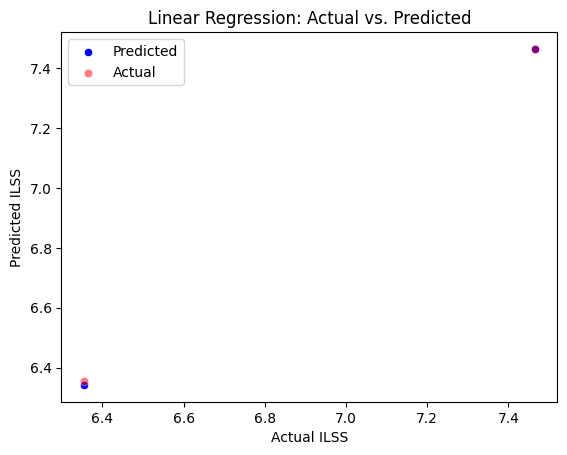

In [292]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual ILSS')
plt.ylabel('Predicted ILSS')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RidgeReg Model - ILSS

In [293]:
modelRR = Ridge(alpha=1.0)
modelRR.fit(xTrain, yTrain)

Ridge()

In [294]:
yPred = modelRR.predict(xTest)
yPred

array([6.20018433, 6.84062995])

In [295]:
rmseRR = np.sqrt(mean_squared_error(yTest, yPred))
maeRR = mean_absolute_error(yTest, yPred)
mseRR = mean_squared_error(yTest, yPred)
rsRR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRR)
print("Mean Absolute Error: ", maeRR)
print('Mean Squared Error:', mseRR)
print('R-squared:', rsRR)

Root Mean Square Error:  0.4549207186849615
Mean Absolute Error:  0.389450386011958
Mean Squared Error: 0.20695286028884188
R-squared: 0.3289580818339539


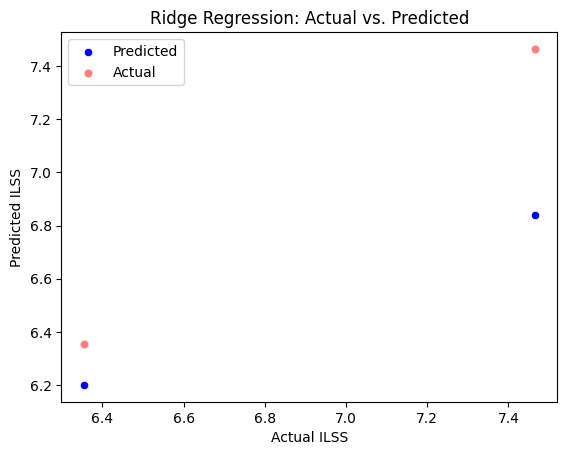

In [296]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual ILSS')
plt.ylabel('Predicted ILSS')
plt.title('Ridge Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# LassoReg Model - ILSS

In [297]:
modelLSR = Lasso(alpha=1.0)
modelLSR.fit(xTrain, yTrain)

Lasso()

In [298]:
yPred = modelLSR.predict(xTest)
yPred

array([6.50908223, 6.50908223])

In [299]:
rmseLSR = np.sqrt(mean_squared_error(yTest, yPred))
maeLSR = mean_absolute_error(yTest, yPred)
mseLSR = mean_squared_error(yTest, yPred)
rsLSR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLSR)
print("Mean Absolute Error: ", maeLSR)
print('Mean Squared Error:', mseLSR)
print('R-squared:', rsLSR)

Root Mean Square Error:  0.6848548046301144
Mean Absolute Error:  0.5553424750000002
Mean Squared Error: 0.46902610342495216
R-squared: -0.5208109502470868


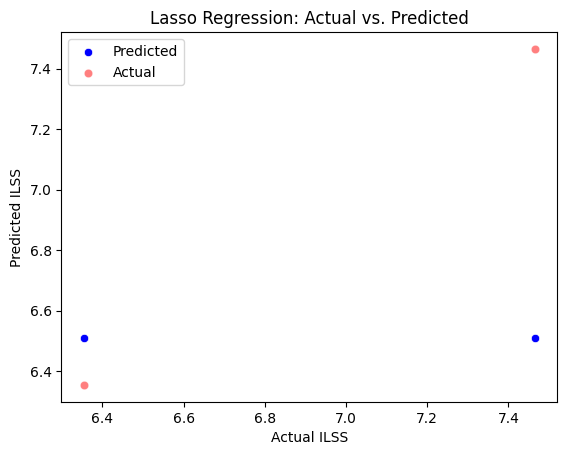

In [300]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual ILSS')
plt.ylabel('Predicted ILSS')
plt.title('Lasso Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# ElasticNetReg Model - ILSS

In [301]:
modelEN = ElasticNet(alpha=1.0, l1_ratio=0.5)
modelEN.fit(xTrain, yTrain)

ElasticNet()

In [302]:
yPred = modelEN.predict(xTest)
yPred

array([6.50908223, 6.50908223])

In [303]:
rmseEN = np.sqrt(mean_squared_error(yTest, yPred))
maeEN = mean_absolute_error(yTest, yPred)
mseEN = mean_squared_error(yTest, yPred)
rsEN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseEN)
print("Mean Absolute Error: ", maeEN)
print('Mean Squared Error:', mseEN)
print('R-squared:', rsEN)

Root Mean Square Error:  0.6848548046301144
Mean Absolute Error:  0.5553424750000002
Mean Squared Error: 0.46902610342495216
R-squared: -0.5208109502470868


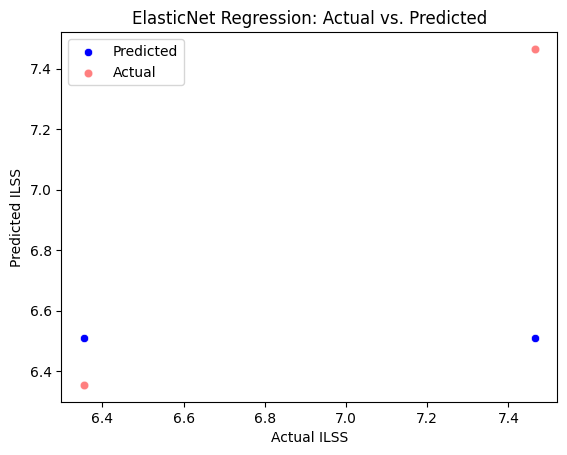

In [304]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual ILSS')
plt.ylabel('Predicted ILSS')
plt.title('ElasticNet Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# PolyReg Model - ILSS

In [305]:
rsPRlist = []
for i in range(1, 25):
    polyReg = PolynomialFeatures(degree=i)
    linReg = LinearRegression()
    modelPR = Pipeline([('poly', polyReg), ('linear', linReg)])
    modelPR.fit(xTrain, yTrain)
    yPred = modelPR.predict(xTest)
    print("Poly Features Degree: ", i)
    rmsePR = np.sqrt(mean_squared_error(yTest, yPred))
    maePR = mean_absolute_error(yTest, yPred)
    msePR = mean_squared_error(yTest, yPred)
    rsPR = r2_score(yTest, yPred)
    print("Root Mean Square Error: ", rmsePR)
    print("Mean Absolute Error: ", maePR)
    print('Mean Squared Error:', msePR)
    print('R-squared:', rsPR)
    rsPRlist.append(rsPR)
    print("\n")

Poly Features Degree:  1
Root Mean Square Error:  0.008881276470857676
Mean Absolute Error:  0.006875864203096604
Mean Squared Error: 7.887707175181019e-05
R-squared: 0.9997442421358478


Poly Features Degree:  2
Root Mean Square Error:  0.016649067923240442
Mean Absolute Error:  0.012729527076250413
Mean Squared Error: 0.0002771914627126738
R-squared: 0.9991012103404691


Poly Features Degree:  3
Root Mean Square Error:  0.024816970818161293
Mean Absolute Error:  0.019057753385903986
Mean Squared Error: 0.0006158820405894692
R-squared: 0.9980030106116708


Poly Features Degree:  4
Root Mean Square Error:  0.0348866059202065
Mean Absolute Error:  0.026674937982549718
Mean Squared Error: 0.0012170752726317876
R-squared: 0.9960536494911961


Poly Features Degree:  5
Root Mean Square Error:  0.04608873983414335
Mean Absolute Error:  0.03507975811363506
Mean Squared Error: 0.002124171939499352
R-squared: 0.9931124005205499


Poly Features Degree:  6
Root Mean Square Error:  0.0581837840851

In [306]:
prDf = pd.DataFrame({'Index': range(len(rsPRlist)), 'ILSS Values': rsPRlist})
fig = px.line(prDf, x='Index', y='ILSS Values')
fig.show()

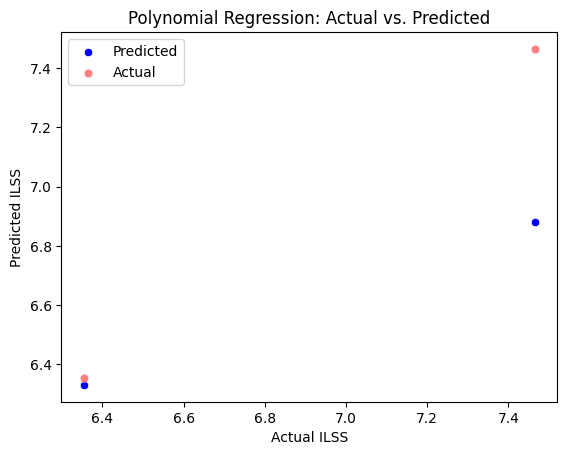

In [307]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual ILSS')
plt.ylabel('Predicted ILSS')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# KNeighborsReg Model - ILSS

In [308]:
modelKN = KNeighborsRegressor(n_neighbors=3)
modelKN.fit(xTrain, yTrain)

KNeighborsRegressor(n_neighbors=3)

In [309]:
yPred = modelKN.predict(xTest)
yPred

array([6.25620261, 7.54835   ])

In [310]:
rmseKN = np.sqrt(mean_squared_error(yTest, yPred))
maeKN = mean_absolute_error(yTest, yPred)
mseKN = mean_squared_error(yTest, yPred)
rsKN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseKN)
print("Mean Absolute Error: ", maeKN)
print('Mean Squared Error:', mseKN)
print('R-squared:', rsKN)

Root Mean Square Error:  0.09104740216800938
Mean Absolute Error:  0.09073122133333289
Mean Squared Error: 0.00828962944154324
R-squared: 0.9731209859405899


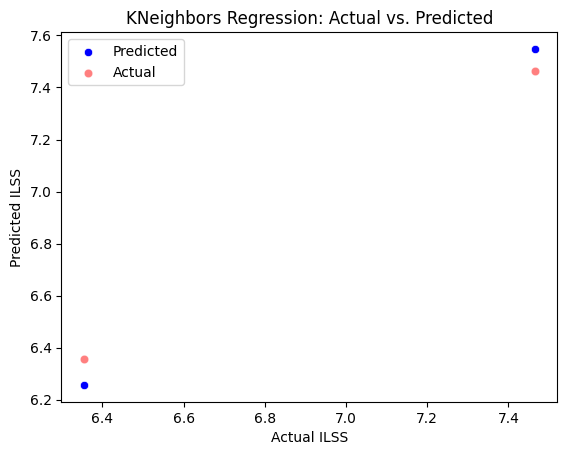

In [311]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual ILSS')
plt.ylabel('Predicted ILSS')
plt.title('KNeighbors Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# DecisionTreeReg Model - ILSS

In [312]:
modelDT = DecisionTreeRegressor(random_state=42)
modelDT.fit(xTrain, yTrain)

DecisionTreeRegressor(random_state=42)

In [313]:
yPred = modelDT.predict(xTest)
yPred

array([6.14513423, 7.9101    ])

In [314]:
rmseDT = np.sqrt(mean_squared_error(yTest, yPred))
maeDT = mean_absolute_error(yTest, yPred)
mseDT = mean_squared_error(yTest, yPred)
rsDT = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseDT)
print('Mean Absolute Error:', maeDT)
print('Mean Squared Error:', mseDT)
print('R-squared:', rsDT)

Root Mean Square Error:  0.3476897601464525
Mean Absolute Error: 0.3271404109999998
Mean Squared Error: 0.12088816931069767
R-squared: 0.608021706466813


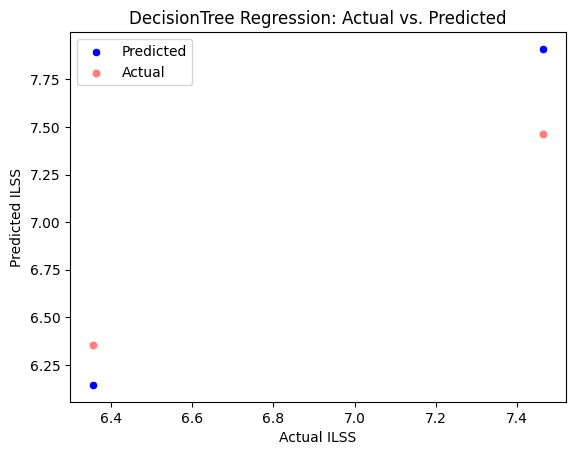

In [315]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual ILSS')
plt.ylabel('Predicted ILSS')
plt.title('DecisionTree Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RandomForestReg Model - ILSS

In [316]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)
modelRF.fit(xTrain, yTrain)

RandomForestRegressor(random_state=42)

In [317]:
yPred = modelRF.predict(xTest)
yPred

array([6.19846587, 7.57628532])

In [318]:
rmseRF = np.sqrt(mean_squared_error(yTest, yPred))
maeRF = mean_absolute_error(yTest, yPred)
mseRF = mean_squared_error(yTest, yPred)
rsRF = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRF)
print('Mean Absolute Error:', maeRF)
print('Mean Squared Error:', mseRF)
print('R-squared:', rsRF)

Root Mean Square Error:  0.13544610208249527
Mean Absolute Error: 0.13356724704000422
Mean Squared Error: 0.018345646569341734
R-squared: 0.9405144831209121


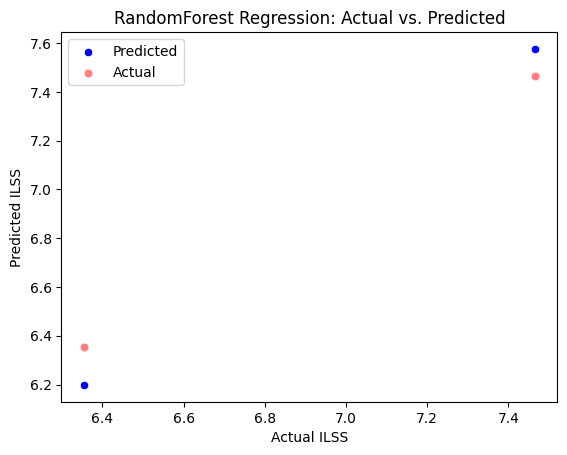

In [319]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual ILSS')
plt.ylabel('Predicted ILSS')
plt.title('RandomForest Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# SupportVectorReg Model - ILSS

In [320]:
modelSVR = SVR()
modelSVR.fit(xTrain, yTrain)

SVR()

In [321]:
yPred = modelSVR.predict(xTest)
yPred

array([6.34223323, 7.10485432])

In [322]:
rmseSVR = np.sqrt(mean_squared_error(yTest, yPred))
maeSVR = mean_absolute_error(yTest, yPred)
mseSVR = mean_squared_error(yTest, yPred)
rsSVR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseSVR)
print('Mean Absolute Error:', maeSVR)
print('Mean Squared Error:', mseSVR)
print('R-squared:', rsSVR)

Root Mean Square Error:  0.2549508293156711
Mean Absolute Error: 0.18631374888786478
Mean Squared Error: 0.06499992536874846
R-squared: 0.7892385998472402


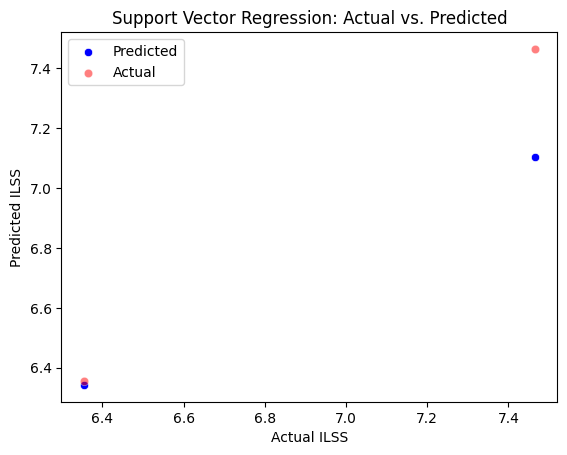

In [323]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual ILSS')
plt.ylabel('Predicted ILSS')
plt.title('Support Vector Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# GradBoostingReg  - ILSS

In [324]:
modelGBR = GradientBoostingRegressor(random_state=42)
modelGBR.fit(xTrain, yTrain)

GradientBoostingRegressor(random_state=42)

In [325]:
yPred = modelGBR.predict(xTest)
yPred

array([6.13292587, 7.7388446 ])

In [326]:
rmseGBR = np.sqrt(mean_squared_error(yTest, yPred))
maeGBR = mean_absolute_error(yTest, yPred)
mseGBR = mean_squared_error(yTest, yPred)
rsGBR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseGBR)
print('Mean Absolute Error:', maeGBR)
print('Mean Squared Error:', mseGBR)
print('R-squared:', rsGBR)

Root Mean Square Error:  0.24898105502274712
Mean Absolute Error: 0.2476168898966189
Mean Squared Error: 0.06199156576024022
R-squared: 0.7989931661741279


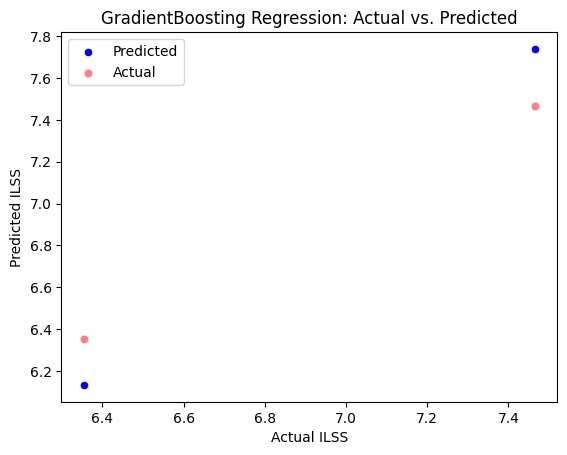

In [327]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual ILSS')
plt.ylabel('Predicted ILSS')
plt.title('GradientBoosting Regression: Actual vs. Predicted')
plt.legend()
plt.show()

In [328]:
models = ['Linear Reg', 'Ridge Reg', 'Lasso Reg', 'ElasticNet Reg', 'Poly Reg', 'KNeighbors Reg', 'DecisionTree Reg', 'RandomForest Reg', 'SupportVector Reg', 'GradientBoosting Reg']
rsScores = [rsLR, rsRR, rsLSR, rsEN, rsPR, rsKN, rsDT, rsRF, rsSVR, rsGBR]
mseScores = [mseLR, mseRR, mseLSR, mseEN, msePR, mseKN, mseDT, mseRF, mseSVR, mseGBR]
maeScores = [maeLR, maeRR, maeLSR, maeEN, maePR, maeKN, maeDT, maeRF, maeSVR, maeGBR]
rmseScores = [rmseLR, rmseRR, rmseLSR, rmseEN, rmsePR, rmseKN, rmseDT, rmseRF, rmseSVR, rmseGBR]

In [329]:
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg']

In [330]:
rsDf = pd.DataFrame(list(zip(models, rsScores)), columns = ['Model', 'R-squared'])
fig = px.bar(rsDf, x='Model', y='R-squared', title='Model Comparison (R-squared) - ILSS')
fig.show()

In [331]:
mseDf = pd.DataFrame(list(zip(models, mseScores)), columns = ['Model', 'MSE'])
fig = px.bar(mseDf, x='Model', y='MSE', title='Model Comparison (Mean Squared Error) - ILSS')
fig.show()

In [332]:
rmseDf = pd.DataFrame(list(zip(models, rmseScores)), columns = ['Model', 'RMSE'])
fig = px.bar(rmseDf, x='Model', y='RMSE', title='Model Comparison (Root Mean Squared Error) - ILSS')
fig.show()

In [333]:
rsDf = pd.DataFrame(list(zip(models, maeScores)), columns = ['Model', 'MAE'])
fig = px.bar(rsDf, x='Model', y='MAE', title='Model Comparison (Mean Absolute Error) - ILSS')
fig.show()

In [334]:
outLR = modelLR.predict(dataStuff)
outRR = modelRR.predict(dataStuff)
outLSR = modelLSR.predict(dataStuff)
outEN = modelEN.predict(dataStuff)
outPR = modelPR.predict(dataStuff)
outKN = modelKN.predict(dataStuff)
outDT = modelDT.predict(dataStuff)
outRF = modelRF.predict(dataStuff)
outSVR = modelSVR.predict(dataStuff)
outGBR = modelGBR.predict(dataStuff)
outActual = np.array(targetStuff)
outList = [outLR, outRR, outLSR, outEN, outPR, outKN, outDT, outRF, outSVR, outGBR, outActual]
outList

[array([5.21083849, 7.46394548, 7.39846304, 7.33880056, 7.91844792,
        5.46272363, 6.51251654, 6.14738726, 6.34201784, 6.08348039]),
 array([6.79446208, 6.84062995, 6.82563773, 6.82478748, 6.8400775 ,
        6.18941096, 6.20612885, 6.19565329, 6.20018433, 6.19649993]),
 array([6.50908223, 6.50908223, 6.50908223, 6.50908223, 6.50908223,
        6.50908223, 6.50908223, 6.50908223, 6.50908223, 6.50908223]),
 array([6.50908223, 6.50908223, 6.50908223, 6.50908223, 6.50908223,
        6.50908223, 6.50908223, 6.50908223, 6.50908223, 6.50908223]),
 array([5.2215    , 6.88130063, 7.39715   , 7.3378    , 7.9101    ,
        5.4375    , 6.54069767, 6.14513423, 6.33010015, 6.08277592]),
 array([6.65215   , 7.54835   , 7.54835   , 7.54835   , 7.54835   ,
        5.88847005, 6.25620261, 6.25620261, 6.25620261, 6.25620261]),
 array([5.2215    , 7.9101    , 7.39715   , 7.3378    , 7.9101    ,
        5.4375    , 6.54069767, 6.14513423, 6.14513423, 6.08277592]),
 array([5.67847582, 7.57628532, 7.

In [335]:
models.append("Actual Targets")
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg',
 'Actual Targets']

In [336]:
allDf = []
for i in range(len(models)):
    allDf.append(pd.DataFrame({"ILSS Predicted Values": outList[i], "Models": models[i], "Index": range(len(outList[i]))}))

In [337]:
combinedDf = pd.concat(allDf, ignore_index=True)
combinedDf

ILSS Predicted Values          Models  Index
0                 5.210838      Linear Reg      0
1                 7.463945      Linear Reg      1
2                 7.398463      Linear Reg      2
3                 7.338801      Linear Reg      3
4                 7.918448      Linear Reg      4
..                     ...             ...    ...
105               5.437500  Actual Targets      5
106               6.540698  Actual Targets      6
107               6.145134  Actual Targets      7
108               6.354515  Actual Targets      8
109               6.082776  Actual Targets      9

[110 rows x 3 columns]

In [338]:
fig = px.line(combinedDf, x='Index', y='ILSS Predicted Values', color='Models')
fig.show()

/Users/Sid/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



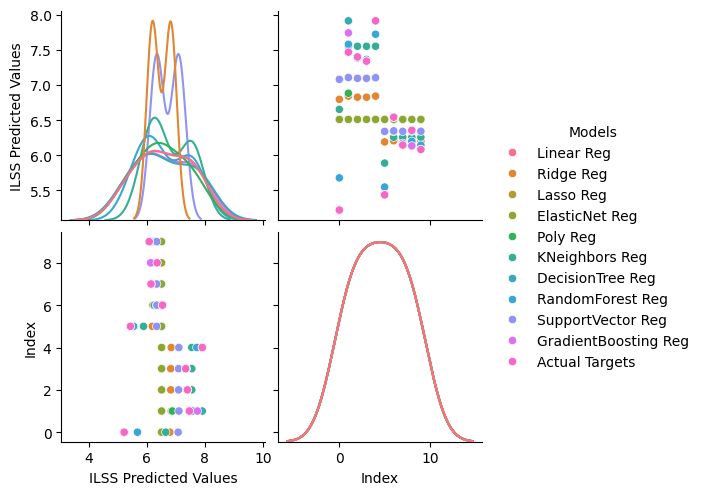

In [339]:
pairGrid = sns.pairplot(data=combinedDf, hue="Models", diag_kind="scatter")
pairGrid.map_diag(sns.kdeplot)
plt.show()

# WaterAbsorbption WeightGain

In [351]:
df = pd.read_csv("sepSheets/waTsSheet.csv")
df

Days  WaterAbsWeightGain  ThicknessGain
0      1            0.000000       0.000000
1      2            1.773152       0.258960
2      3            3.379259       1.713985
3      4            4.003040       2.128433
4      5            5.260677       2.283737
5      6            5.420240       2.489552
6      7            5.638493       2.955124
7      8            5.846702       3.580133
8      9            6.094880       3.735450
9     10            6.084742       4.778050
10    11            6.094554       4.778050

In [352]:
df.describe()

Days  WaterAbsWeightGain  ThicknessGain
count  11.000000           11.000000      11.000000
mean    6.000000            4.508704       2.609225
std     3.316625            2.032752       1.588174
min     1.000000            0.000000       0.000000
25%     3.500000            3.691150       1.921209
50%     6.000000            5.420240       2.489552
75%     8.500000            5.965722       3.657792
max    11.000000            6.094880       4.778050

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Days                11 non-null     int64  
 1   WaterAbsWeightGain  11 non-null     float64
 2   ThicknessGain       11 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 392.0 bytes


In [354]:
df.columns

Index(['Days', 'WaterAbsWeightGain', 'ThicknessGain'], dtype='object')

In [355]:
px.box(df)

Text(0.5, 1.0, '\nRaw Data Correlation Matrix\n')

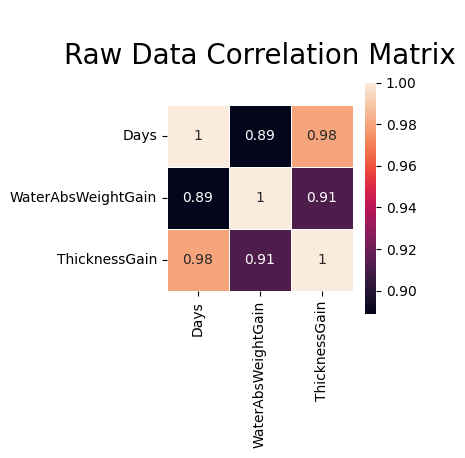

In [356]:
plt.figure(figsize=(df.corr().shape))
sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(df.corr(), linewidths=.5, square = True, annot=True)
plt.title("\nRaw Data Correlation Matrix\n", size = 20)

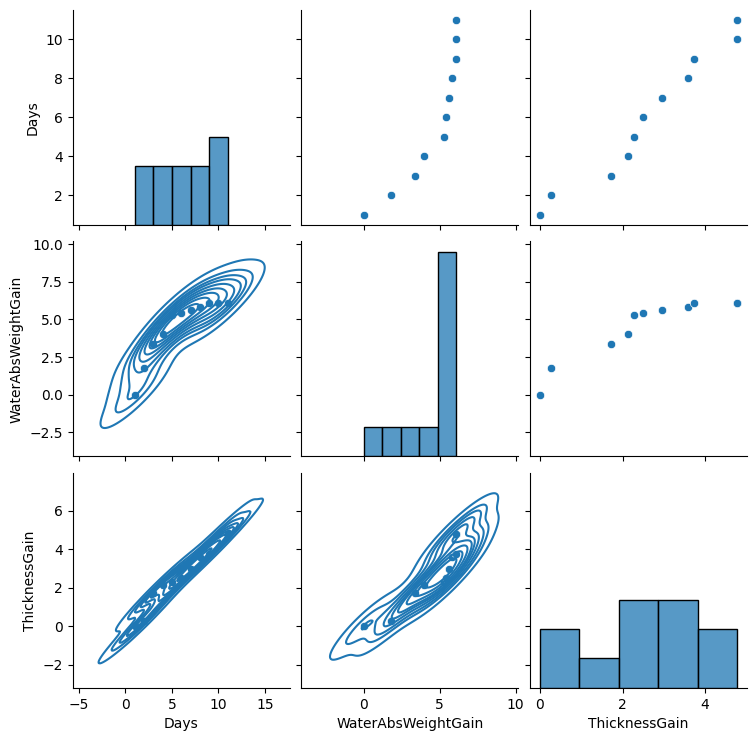

In [357]:
pairGrid = sns.pairplot(data = df)
pairGrid.map_lower(sns.kdeplot)

In [361]:
fig = px.scatter_3d(df, x='Days', y='WaterAbsWeightGain', z='ThicknessGain', color='WaterAbsWeightGain')
fig.show()

In [363]:
dataStuff = df[['Days', 'ThicknessGain']]
targetStuff = df['WaterAbsWeightGain']

In [364]:
xTrain, xTest, yTrain, yTest = train_test_split(dataStuff, targetStuff, test_size=0.2, random_state=42)

# LinearReg Model - WA WeightGain

In [365]:
modelLR = LinearRegression()
modelLR.fit(xTrain, yTrain)

LinearRegression()

In [366]:
yPred = modelLR.predict(xTest)
yPred

array([4.5490112 , 1.93576395, 6.98202495])

In [367]:
rmseLR = np.sqrt(mean_squared_error(yTest, yPred))
maeLR = mean_absolute_error(yTest, yPred)
mseLR = mean_squared_error(yTest, yPred)
rsLR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLR)
print('Mean Absolute Error:', maeLR)
print('Mean Squared Error:', mseLR)
print('R-squared:', rsLR)

Root Mean Square Error:  1.3305810999831693
Mean Absolute Error: 1.2347585279055808
Mean Squared Error: 1.7704460636324209
R-squared: 0.761626163873522


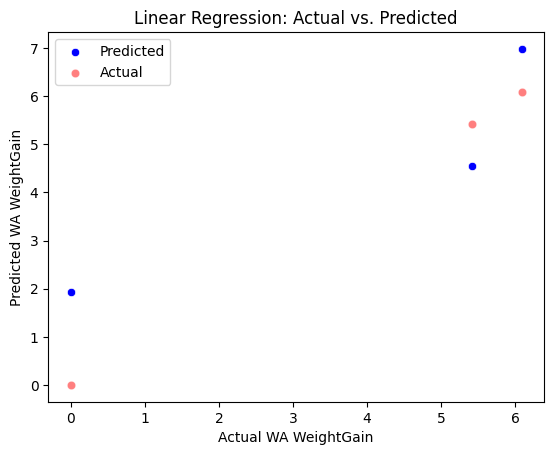

In [368]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual WA WeightGain')
plt.ylabel('Predicted WA WeightGain')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RidgeReg Model - WA WeightGain

In [369]:
modelRR = Ridge(alpha=1.0)
modelRR.fit(xTrain, yTrain)

Ridge()

In [370]:
yPred = modelRR.predict(xTest)
yPred

array([4.63169218, 2.23095573, 6.71448177])

In [371]:
rmseRR = np.sqrt(mean_squared_error(yTest, yPred))
maeRR = mean_absolute_error(yTest, yPred)
mseRR = mean_squared_error(yTest, yPred)
rsRR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRR)
print("Mean Absolute Error: ", maeRR)
print('Mean Squared Error:', mseRR)
print('R-squared:', rsRR)

Root Mean Square Error:  1.4136882119587826
Mean Absolute Error:  1.2164143998981587
Mean Squared Error: 1.99851436063122
R-squared: 0.7309189223646251


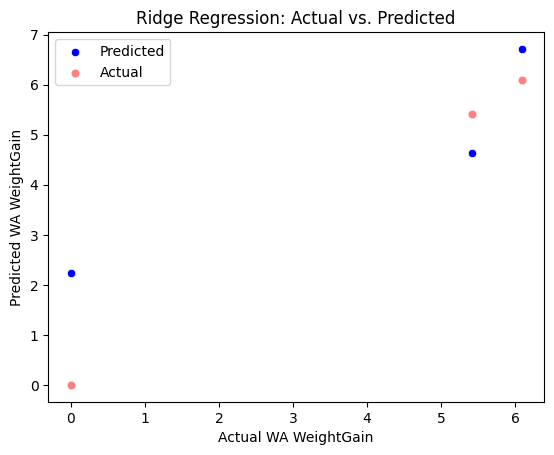

In [372]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual WA WeightGain')
plt.ylabel('Predicted WA WeightGain')
plt.title('Ridge Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# LassoReg Model - WA WeightGain

In [373]:
modelLSR = Lasso(alpha=1.0)
modelLSR.fit(xTrain, yTrain)

Lasso()

In [374]:
yPred = modelLSR.predict(xTest)
yPred

array([4.7199095 , 3.06249973, 6.04583732])

In [375]:
rmseLSR = np.sqrt(mean_squared_error(yTest, yPred))
maeLSR = mean_absolute_error(yTest, yPred)
mseLSR = mean_squared_error(yTest, yPred)
rsLSR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLSR)
print("Mean Absolute Error: ", maeLSR)
print('Mean Squared Error:', mseLSR)
print('R-squared:', rsLSR)

Root Mean Square Error:  1.8139166307563583
Mean Absolute Error:  1.267244839779189
Mean Squared Error: 3.290293543334499
R-squared: 0.5569930595357202


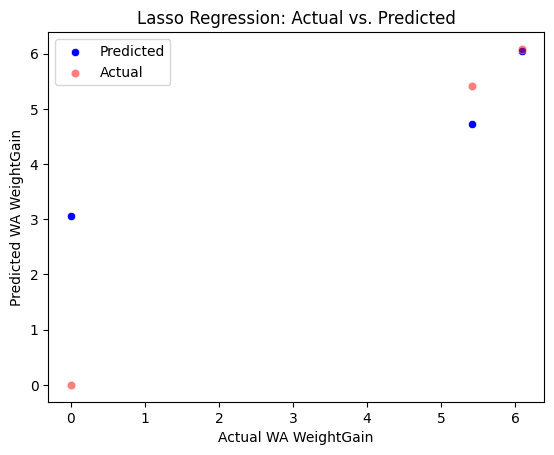

In [376]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual WA WeightGain')
plt.ylabel('Predicted WA WeightGain')
plt.title('Lasso Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# ElasticNetReg Model - WA WeightGain

In [377]:
modelEN = ElasticNet(alpha=1.0, l1_ratio=0.5)
modelEN.fit(xTrain, yTrain)

ElasticNet()

In [378]:
yPred = modelEN.predict(xTest)
yPred

array([4.71532276, 2.8744432 , 6.18802641])

In [379]:
rmseEN = np.sqrt(mean_squared_error(yTest, yPred))
maeEN = mean_absolute_error(yTest, yPred)
mseEN = mean_squared_error(yTest, yPred)
rsEN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseEN)
print("Mean Absolute Error: ", maeEN)
print('Mean Squared Error:', mseEN)
print('R-squared:', rsEN)

Root Mean Square Error:  1.7097757514070038
Mean Absolute Error:  1.227548242310463
Mean Squared Error: 2.9233331200993846
R-squared: 0.6064008136548603


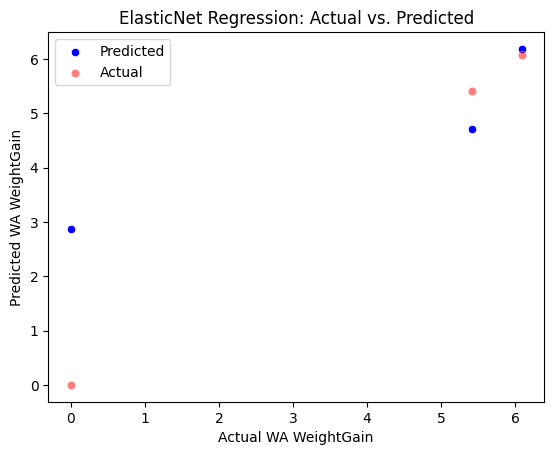

In [380]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual WA WeightGain')
plt.ylabel('Predicted WA WeightGain')
plt.title('ElasticNet Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# PolyReg Model - WA WeightGain

In [381]:
rsPRlist = []
for i in range(1, 25):
    polyReg = PolynomialFeatures(degree=i)
    linReg = LinearRegression()
    modelPR = Pipeline([('poly', polyReg), ('linear', linReg)])
    modelPR.fit(xTrain, yTrain)
    yPred = modelPR.predict(xTest)
    print("Poly Features Degree: ", i)
    rmsePR = np.sqrt(mean_squared_error(yTest, yPred))
    maePR = mean_absolute_error(yTest, yPred)
    msePR = mean_squared_error(yTest, yPred)
    rsPR = r2_score(yTest, yPred)
    print("Root Mean Square Error: ", rmsePR)
    print("Mean Absolute Error: ", maePR)
    print('Mean Squared Error:', msePR)
    print('R-squared:', rsPR)
    rsPRlist.append(rsPR)
    print("\n")

Poly Features Degree:  1
Root Mean Square Error:  1.3305810999831693
Mean Absolute Error:  1.2347585279055806
Mean Squared Error: 1.7704460636324209
R-squared: 0.761626163873522


Poly Features Degree:  2
Root Mean Square Error:  1.4898729897060579
Mean Absolute Error:  1.209318821384464
Mean Squared Error: 2.2197215254556673
R-squared: 0.7011354674822552


Poly Features Degree:  3
Root Mean Square Error:  4.755516904855047
Mean Absolute Error:  3.6933926038450386
Mean Squared Error: 22.614941032362122
R-squared: -2.0448881546822926


Poly Features Degree:  4
Root Mean Square Error:  10.234630146019558
Mean Absolute Error:  6.793020882585167
Mean Squared Error: 104.74765422581231
R-squared: -13.103282034939662


Poly Features Degree:  5
Root Mean Square Error:  27.113980506835627
Mean Absolute Error:  16.695378714390902
Mean Squared Error: 735.1679389250625
R-squared: -97.98341745538069


Poly Features Degree:  6
Root Mean Square Error:  84.35227782004027
Mean Absolute Error:  50.05582

In [382]:
prDf = pd.DataFrame({'Index': range(len(rsPRlist)), 'WA WeightGain Values': rsPRlist})
fig = px.line(prDf, x='Index', y='WA WeightGain Values')
fig.show()

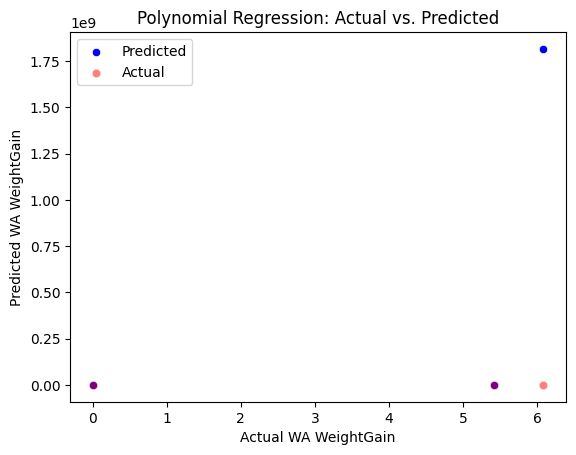

In [383]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual WA WeightGain')
plt.ylabel('Predicted WA WeightGain')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# KNeighborsReg Model - WA WeightGain

In [384]:
modelKN = KNeighborsRegressor(n_neighbors=3)
modelKN.fit(xTrain, yTrain)

KNeighborsRegressor(n_neighbors=3)

In [385]:
yPred = modelKN.predict(xTest)
yPred

array([4.96740356, 3.05181722, 6.01204535])

In [386]:
rmseKN = np.sqrt(mean_squared_error(yTest, yPred))
maeKN = mean_absolute_error(yTest, yPred)
mseKN = mean_squared_error(yTest, yPred)
rsKN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseKN)
print("Mean Absolute Error: ", maeKN)
print('Mean Squared Error:', mseKN)
print('R-squared:', rsKN)

Root Mean Square Error:  1.7817532297576404
Mean Absolute Error:  1.1924499718888886
Mean Squared Error: 3.1746445717517826
R-squared: 0.5725641009622484


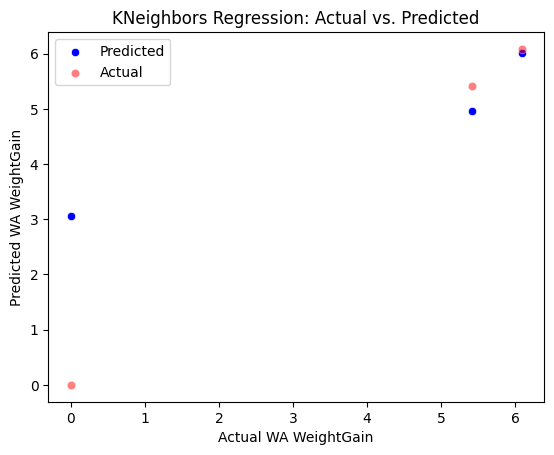

In [387]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual WA WeightGain')
plt.ylabel('Predicted WA WeightGain')
plt.title('KNeighbors Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# DecisionTreeReg Model - WA WeightGain

In [388]:
modelDT = DecisionTreeRegressor(random_state=42)
modelDT.fit(xTrain, yTrain)

DecisionTreeRegressor(random_state=42)

In [389]:
yPred = modelDT.predict(xTest)
yPred

array([5.26067721, 1.77315247, 6.09488007])

In [390]:
rmseDT = np.sqrt(mean_squared_error(yTest, yPred))
maeDT = mean_absolute_error(yTest, yPred)
mseDT = mean_squared_error(yTest, yPred)
rsDT = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseDT)
print('Mean Absolute Error:', maeDT)
print('Mean Squared Error:', mseDT)
print('R-squared:', rsDT)

Root Mean Square Error:  1.027883371828035
Mean Absolute Error: 0.6476177370000001
Mean Squared Error: 1.0565442260805702
R-squared: 0.8577463016911224


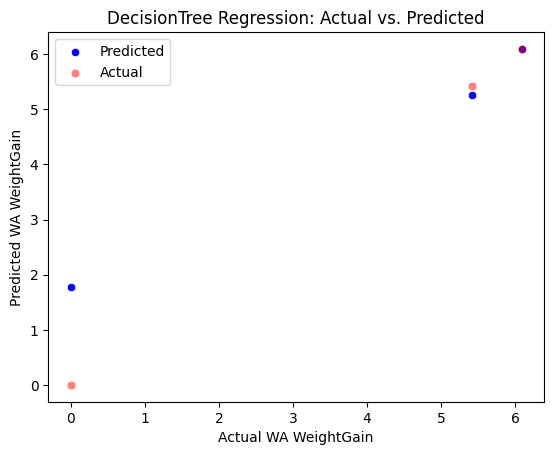

In [391]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual WA WeightGain')
plt.ylabel('Predicted WA WeightGain')
plt.title('DecisionTree Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RandomForestReg Model - WA WeightGain

In [392]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)
modelRF.fit(xTrain, yTrain)

RandomForestRegressor(random_state=42)

In [393]:
yPred = modelRF.predict(xTest)
yPred

array([5.20130092, 2.4166835 , 6.07279391])

In [394]:
rmseRF = np.sqrt(mean_squared_error(yTest, yPred))
maeRF = mean_absolute_error(yTest, yPred)
mseRF = mean_squared_error(yTest, yPred)
rsRF = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRF)
print('Mean Absolute Error:', maeRF)
print('Mean Squared Error:', mseRF)
print('R-squared:', rsRF)

Root Mean Square Error:  1.4010039369532459
Mean Absolute Error: 0.8825234246700009
Mean Squared Error: 1.9628120313584947
R-squared: 0.7357259037023842


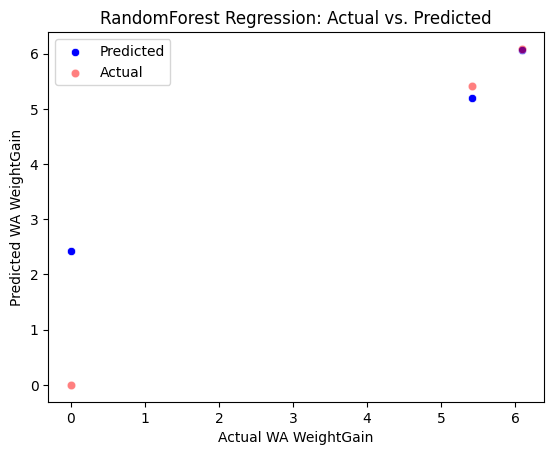

In [395]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual WA WeightGain')
plt.ylabel('Predicted WA WeightGain')
plt.title('RandomForest Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# SupportVectorReg Model - WA WeightGain

In [396]:
modelSVR = SVR()
modelSVR.fit(xTrain, yTrain)

SVR()

In [397]:
yPred = modelSVR.predict(xTest)
yPred

array([5.10905765, 3.43099351, 6.04235098])

In [398]:
rmseSVR = np.sqrt(mean_squared_error(yTest, yPred))
maeSVR = mean_absolute_error(yTest, yPred)
mseSVR = mean_squared_error(yTest, yPred)
rsSVR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseSVR)
print('Mean Absolute Error:', maeSVR)
print('Mean Squared Error:', mseSVR)
print('R-squared:', rsSVR)

Root Mean Square Error:  1.9891663038009302
Mean Absolute Error: 1.2615221632754914
Mean Squared Error: 3.9567825841770543
R-squared: 0.46725660686122517


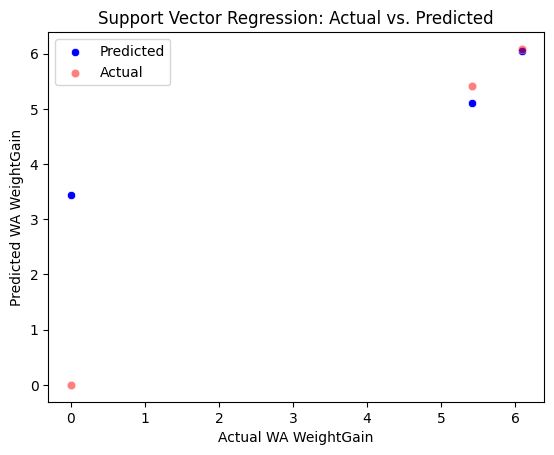

In [399]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual WA WeightGain')
plt.ylabel('Predicted WA WeightGain')
plt.title('Support Vector Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# GradBoostingReg  - WA WeightGain

In [400]:
modelGBR = GradientBoostingRegressor(random_state=42)
modelGBR.fit(xTrain, yTrain)

GradientBoostingRegressor(random_state=42)

In [401]:
yPred = modelGBR.predict(xTest)
yPred

array([5.26066506, 1.77323184, 6.0946784 ])

In [402]:
rmseGBR = np.sqrt(mean_squared_error(yTest, yPred))
maeGBR = mean_absolute_error(yTest, yPred)
mseGBR = mean_squared_error(yTest, yPred)
rsGBR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseGBR)
print('Mean Absolute Error:', maeGBR)
print('Mean Squared Error:', mseGBR)
print('R-squared:', rsGBR)

Root Mean Square Error:  1.0279289834830723
Mean Absolute Error: 0.6475810201685239
Mean Squared Error: 1.0566379950845421
R-squared: 0.857733676580623


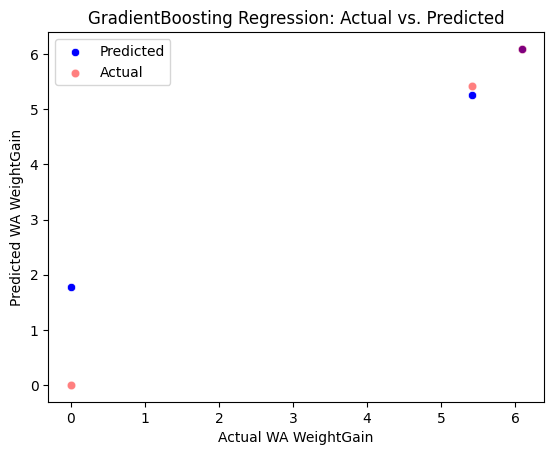

In [403]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual WA WeightGain')
plt.ylabel('Predicted WA WeightGain')
plt.title('GradientBoosting Regression: Actual vs. Predicted')
plt.legend()
plt.show()

In [404]:
models = ['Linear Reg', 'Ridge Reg', 'Lasso Reg', 'ElasticNet Reg', 'Poly Reg', 'KNeighbors Reg', 'DecisionTree Reg', 'RandomForest Reg', 'SupportVector Reg', 'GradientBoosting Reg']
rsScores = [rsLR, rsRR, rsLSR, rsEN, rsPR, rsKN, rsDT, rsRF, rsSVR, rsGBR]
mseScores = [mseLR, mseRR, mseLSR, mseEN, msePR, mseKN, mseDT, mseRF, mseSVR, mseGBR]
maeScores = [maeLR, maeRR, maeLSR, maeEN, maePR, maeKN, maeDT, maeRF, maeSVR, maeGBR]
rmseScores = [rmseLR, rmseRR, rmseLSR, rmseEN, rmsePR, rmseKN, rmseDT, rmseRF, rmseSVR, rmseGBR]

In [405]:
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg']

In [406]:
rsDf = pd.DataFrame(list(zip(models, rsScores)), columns = ['Model', 'R-squared'])
fig = px.bar(rsDf, x='Model', y='R-squared', title='Model Comparison (R-squared) - WA WeightGain')
fig.show()

In [407]:
mseDf = pd.DataFrame(list(zip(models, mseScores)), columns = ['Model', 'MSE'])
fig = px.bar(mseDf, x='Model', y='MSE', title='Model Comparison (Mean Squared Error) - WA WeightGain')
fig.show()

In [408]:
rmseDf = pd.DataFrame(list(zip(models, rmseScores)), columns = ['Model', 'RMSE'])
fig = px.bar(rmseDf, x='Model', y='RMSE', title='Model Comparison (Root Mean Squared Error) - WA WeightGain')
fig.show()

In [409]:
rsDf = pd.DataFrame(list(zip(models, maeScores)), columns = ['Model', 'MAE'])
fig = px.bar(rsDf, x='Model', y='MAE', title='Model Comparison (Mean Absolute Error) - WA WeightGain')
fig.show()

In [410]:
outLR = modelLR.predict(dataStuff)
outRR = modelRR.predict(dataStuff)
outLSR = modelLSR.predict(dataStuff)
outEN = modelEN.predict(dataStuff)
outPR = modelPR.predict(dataStuff)
outKN = modelKN.predict(dataStuff)
outDT = modelDT.predict(dataStuff)
outRF = modelRF.predict(dataStuff)
outSVR = modelSVR.predict(dataStuff)
outGBR = modelGBR.predict(dataStuff)
outActual = np.array(targetStuff)
outList = [outLR, outRR, outLSR, outEN, outPR, outKN, outDT, outRF, outSVR, outGBR, outActual]
outList

[array([1.93576395, 2.18279048, 3.80944613, 4.23582393, 4.36328602,
        4.5490112 , 5.03435917, 5.70361347, 5.83109078, 6.98202495,
        6.93034801]),
 array([2.23095573, 2.58054205, 3.58365062, 4.01819459, 4.31114394,
        4.63169218, 5.09416997, 5.64376312, 5.93671968, 6.71448177,
        6.92257401]),
 array([3.06249973, 3.39398169, 3.72546364, 4.0569456 , 4.38842755,
        4.7199095 , 5.05139146, 5.38287341, 5.71435537, 6.04583732,
        6.37731927]),
 array([2.8744432 , 3.24261911, 3.61079502, 3.97897094, 4.34714685,
        4.71532276, 5.08349867, 5.45167458, 5.81985049, 6.18802641,
        6.55620232]),
 array([2.57365999e+00, 2.57366133e+00, 2.57690837e+00, 4.00484081e+00,
        5.26066720e+00, 1.98522495e+03, 5.63848200e+00, 5.84670018e+00,
        6.09487616e+00, 1.81641801e+09, 6.09461368e+00]),
 array([3.05181722, 3.05181722, 3.05181722, 4.21432546, 4.21432546,
        4.96740356, 5.58195727, 5.86002489, 5.86002489, 6.01204535,
        6.01204535]),
 array([

In [411]:
models.append("Actual Targets")
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg',
 'Actual Targets']

In [412]:
allDf = []
for i in range(len(models)):
    allDf.append(pd.DataFrame({"WA WeightGain Predicted Values": outList[i], "Models": models[i], "Index": range(len(outList[i]))}))

In [413]:
combinedDf = pd.concat(allDf, ignore_index=True)
combinedDf

WA WeightGain Predicted Values          Models  Index
0                          1.935764      Linear Reg      0
1                          2.182790      Linear Reg      1
2                          3.809446      Linear Reg      2
3                          4.235824      Linear Reg      3
4                          4.363286      Linear Reg      4
..                              ...             ...    ...
116                        5.638493  Actual Targets      6
117                        5.846702  Actual Targets      7
118                        6.094880  Actual Targets      8
119                        6.084742  Actual Targets      9
120                        6.094554  Actual Targets     10

[121 rows x 3 columns]

In [415]:
fig = px.line(combinedDf, x='Index', y='WA WeightGain Predicted Values', color='Models')
fig.show()

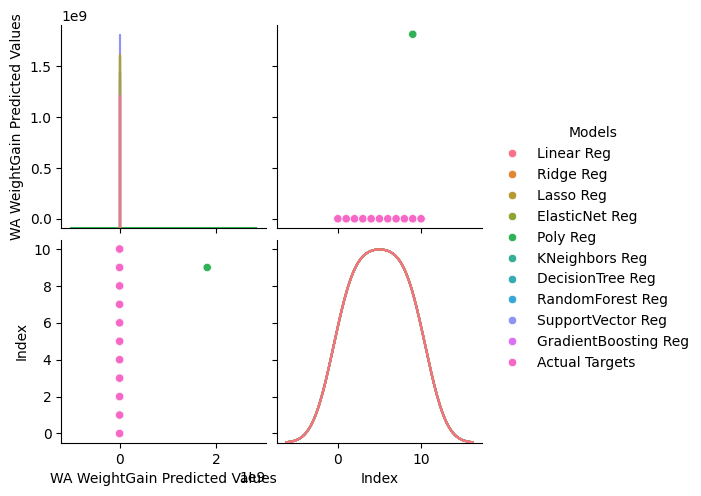

In [416]:
pairGrid = sns.pairplot(data=combinedDf, hue="Models", diag_kind="scatter")
pairGrid.map_diag(sns.kdeplot)
plt.show()

In [417]:
models.remove('Poly Reg')
rsScores.remove(rsPR)
rmseScores.remove(rmsePR)
mseScores.remove(msePR)
maeScores.remove(maePR)

In [418]:
rsDf = pd.DataFrame(list(zip(models, rsScores)), columns = ['Model', 'R-squared'])
fig = px.bar(rsDf, x='Model', y='R-squared', title='Model Comparison (R-squared) w/o PolyReg - WA WeightGain')
fig.show()

In [419]:
mseDf = pd.DataFrame(list(zip(models, mseScores)), columns = ['Model', 'MSE'])
fig = px.bar(mseDf, x='Model', y='MSE', title='Model Comparison (Mean Squared Error) w/o PolyReg - WA WeightGain')
fig.show()

In [420]:
rmseDf = pd.DataFrame(list(zip(models, rmseScores)), columns = ['Model', 'RMSE'])
fig = px.bar(rmseDf, x='Model', y='RMSE', title='Model Comparison (Root Mean Squared Error) w/o PolyReg - WA WeightGain')
fig.show()

In [421]:
rsDf = pd.DataFrame(list(zip(models, maeScores)), columns = ['Model', 'MAE'])
fig = px.bar(rsDf, x='Model', y='MAE', title='Model Comparison (Mean Absolute Error) w/o PolyReg - WA WeightGain')
fig.show()